




























# Lending Club Case Study

In [2]:
import numpy as np
import pandas as pd

#data visualisation
import seaborn as sns
import matplotlib.pyplot as plt


# Extra - To Supress warnigns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("loan.csv")
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [8]:
# Missing Value Check
df.shape

(39717, 111)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [10]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### Data Cleaning


In [11]:
# Remove the columns with NA
df_drop = df.dropna(axis=1, how='all')
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [12]:
# Percentage of missing values
100*df_drop.isnull().mean()

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.585543
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [13]:
# Remove columns with High percentage of missing values
# [next_pymnt_d,mths_since_last_record,mths_since_last_delinq,desc]
dropColumns = ["next_pymnt_d","mths_since_last_record","mths_since_last_delinq","desc"];
df_drop = df_drop.drop(columns = dropColumns)

In [12]:
100*df_drop.isnull().mean()

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [14]:
# Impute column with low percentage of missing values
# emp_title,emp_length
df_impute = df_drop.fillna(value={'emp_title': 'General'})

In [15]:
# Remove rows with very low percentage of missing values.
missing_percentages = df_impute.isnull().mean(axis=1) * 100
threshold = 0.01;


In [16]:
df_filtered = df_impute[missing_percentages <= threshold]
100*df_filtered.isnull().mean(),df_filtered.info();

<class 'pandas.core.frame.DataFrame'>
Index: 37823 entries, 0 to 39623
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          37823 non-null  int64  
 1   member_id                   37823 non-null  int64  
 2   loan_amnt                   37823 non-null  int64  
 3   funded_amnt                 37823 non-null  int64  
 4   funded_amnt_inv             37823 non-null  float64
 5   term                        37823 non-null  object 
 6   int_rate                    37823 non-null  object 
 7   installment                 37823 non-null  float64
 8   grade                       37823 non-null  object 
 9   sub_grade                   37823 non-null  object 
 10  emp_title                   37823 non-null  object 
 11  emp_length                  37823 non-null  object 
 12  home_ownership              37823 non-null  object 
 13  annual_inc                  37823 no

In [17]:
# Remove all columns with values 0 as it wont provide any usefull correlation
zero_value_columns = df_filtered.columns[(df_filtered == 0).all()]
df_non_zero = df_filtered.drop(columns=zero_value_columns)
df_non_zero.info();

<class 'pandas.core.frame.DataFrame'>
Index: 37823 entries, 0 to 39623
Data columns (total 48 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       37823 non-null  int64  
 1   member_id                37823 non-null  int64  
 2   loan_amnt                37823 non-null  int64  
 3   funded_amnt              37823 non-null  int64  
 4   funded_amnt_inv          37823 non-null  float64
 5   term                     37823 non-null  object 
 6   int_rate                 37823 non-null  object 
 7   installment              37823 non-null  float64
 8   grade                    37823 non-null  object 
 9   sub_grade                37823 non-null  object 
 10  emp_title                37823 non-null  object 
 11  emp_length               37823 non-null  object 
 12  home_ownership           37823 non-null  object 
 13  annual_inc               37823 non-null  float64
 14  verification_status      37

In [18]:
# Drop irrelevant columns

# --  List of relevant  columns
rlv_column_list = ['loan_amnt','funded_amnt','term','int_rate','issue_d','installment','grade','emp_length','home_ownership','annual_inc','verification_status','loan_status','purpose','dti','delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','total_pymnt','total_rec_prncp','total_rec_int','recoveries','last_pymnt_d','last_pymnt_amnt','pub_rec_bankruptcies']
df_relevant_cols = df_non_zero[rlv_column_list]
df_relevant_cols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37823 entries, 0 to 39623
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             37823 non-null  int64  
 1   funded_amnt           37823 non-null  int64  
 2   term                  37823 non-null  object 
 3   int_rate              37823 non-null  object 
 4   issue_d               37823 non-null  object 
 5   installment           37823 non-null  float64
 6   grade                 37823 non-null  object 
 7   emp_length            37823 non-null  object 
 8   home_ownership        37823 non-null  object 
 9   annual_inc            37823 non-null  float64
 10  verification_status   37823 non-null  object 
 11  loan_status           37823 non-null  object 
 12  purpose               37823 non-null  object 
 13  dti                   37823 non-null  float64
 14  delinq_2yrs           37823 non-null  int64  
 15  earliest_cr_line      37

In [19]:
# Fix Object Datatypes 
## Convert datatypes for int_rate and revol_util to float

df_relevant_cols['int_rate'] = df_relevant_cols['int_rate'].str.rstrip('%').astype('float')
df_relevant_cols['revol_util'] = df_relevant_cols['revol_util'].str.rstrip('%').astype('float')

In [20]:
df_loan = df_relevant_cols
df_loan

,loan_amnt,funded_amnt,term,int_rate,issue_d,installment,grade,emp_length,home_ownership,annual_inc,...,revol_util,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,recoveries,last_pymnt_d,last_pymnt_amnt,pub_rec_bankruptcies
0,5000,5000,36 months,10.65,Dec-11,162.87,B,10+ years,RENT,24000.00,...,83.7,9,0.00,5863.155187,5000.00,863.16,0.00,Jan-15,171.62,0.0
1,2500,2500,60 months,15.27,Dec-11,59.83,C,< 1 year,RENT,30000.00,...,9.4,4,0.00,1008.710000,456.46,435.17,117.08,Apr-13,119.66,0.0
2,2400,2400,36 months,15.96,Dec-11,84.33,C,10+ years,RENT,12252.00,...,98.5,10,0.00,3005.666844,2400.00,605.67,0.00,Jun-14,649.91,0.0
3,10000,10000,36 months,13.49,Dec-11,339.31,C,10+ years,RENT,49200.00,...,21.0,37,0.00,12231.890000,10000.00,2214.92,0.00,Jan-15,357.48,0.0
4,3000,3000,60 months,12.69,Dec-11,67.79,B,1 year,RENT,80000.00,...,53.9,38,524.06,3513.330000,2475.94,1037.39,0.00,May-16,67.79,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39475,12000,12000,36 months,9.01,Dec-07,381.66,B,6 years,MORTGAGE,100671.39,...,18.6,39,0.00,12347.219880,12000.00,347.22,0.00,May-08,11202.55,1.0
39551,12375,12375,36 months,10.91,Dec-07,404.62,C,2 years,RENT,80000.00,...,96.5,4,0.00,14370.922250,12375.00,1995.92,0.00,Feb-10,4259.11,1.0
39562,4800,4800,36 months,10.28,Nov-07,155.52,C,1 year,RENT,35000.00,...,68.7,12,0.00,5134.085288,4800.00,334.09,0.00,Aug-08,3891.08,1.0
39573,7000,7000,36 months,10.59,Nov-07,227.82,C,3 years,MORTGAGE,63500.00,...,79.0,21,0.00,8174.021910,7000.00,1174.02,0.00,May-10,1571.29,1.0


# Analysis

In [21]:
## Segregate columns based on numerical and categorical data
df_loan.columns,df_loan.shape

(Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'issue_d',
        'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
        'verification_status', 'loan_status', 'purpose', 'dti', 'delinq_2yrs',
        'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
        'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'total_pymnt',
        'total_rec_prncp', 'total_rec_int', 'recoveries', 'last_pymnt_d',
        'last_pymnt_amnt', 'pub_rec_bankruptcies'],
       dtype='object'),
 (37823, 30))

In [70]:
#  use df_loan['col_name'].nunique() to check for unique values. eg : df_loan['pub_rec_bankruptcies'].nunique()
num_cols = ['loan_amnt','int_rate','installment','annual_inc','dti','open_acc',
            'revol_bal','revol_util','total_acc','total_pymnt','recoveries',
           'last_pymnt_amnt']
cat_cols = ['term','grade','emp_length','home_ownership','verification_status','loan_status','purpose','delinq_2yrs','inq_last_6mths',
            'pub_rec','pub_rec_bankruptcies']
extra_cols = ['last_pymnt_d','funded_amnt','earliest_cr_line','out_prncp','total_rec_prncp','total_rec_int']
len(num_cols)+len(cat_cols)+len(extra_cols)

29

In [23]:
df_loan['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [43]:
df_loan = df_loan[df_loan['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [44]:
df_loan.issue_d = pd.to_datetime(df_loan.issue_d, format='%b-%y')
df_loan['year']=df_loan['issue_d'].dt.year
df_loan['month']=df_loan['issue_d'].dt.month

In [45]:
df_loan

,loan_amnt,funded_amnt,term,int_rate,issue_d,installment,grade,emp_length,home_ownership,annual_inc,...,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,recoveries,last_pymnt_d,last_pymnt_amnt,pub_rec_bankruptcies,year,month
0,5000,5000,36 months,10.65,2011-12-01,162.87,B,10+ years,RENT,24000.00,...,0.0,5863.155187,5000.00,863.16,0.00,Jan-15,171.62,0.0,2011,12
1,2500,2500,60 months,15.27,2011-12-01,59.83,C,< 1 year,RENT,30000.00,...,0.0,1008.710000,456.46,435.17,117.08,Apr-13,119.66,0.0,2011,12
2,2400,2400,36 months,15.96,2011-12-01,84.33,C,10+ years,RENT,12252.00,...,0.0,3005.666844,2400.00,605.67,0.00,Jun-14,649.91,0.0,2011,12
3,10000,10000,36 months,13.49,2011-12-01,339.31,C,10+ years,RENT,49200.00,...,0.0,12231.890000,10000.00,2214.92,0.00,Jan-15,357.48,0.0,2011,12
5,5000,5000,36 months,7.90,2011-12-01,156.46,A,3 years,RENT,36000.00,...,0.0,5632.210000,5000.00,632.21,0.00,Jan-15,161.03,0.0,2011,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39475,12000,12000,36 months,9.01,2007-12-01,381.66,B,6 years,MORTGAGE,100671.39,...,0.0,12347.219880,12000.00,347.22,0.00,May-08,11202.55,1.0,2007,12
39551,12375,12375,36 months,10.91,2007-12-01,404.62,C,2 years,RENT,80000.00,...,0.0,14370.922250,12375.00,1995.92,0.00,Feb-10,4259.11,1.0,2007,12
39562,4800,4800,36 months,10.28,2007-11-01,155.52,C,1 year,RENT,35000.00,...,0.0,5134.085288,4800.00,334.09,0.00,Aug-08,3891.08,1.0,2007,11
39573,7000,7000,36 months,10.59,2007-11-01,227.82,C,3 years,MORTGAGE,63500.00,...,0.0,8174.021910,7000.00,1174.02,0.00,May-10,1571.29,1.0,2007,11


## Univariate Analysis

### Numerical

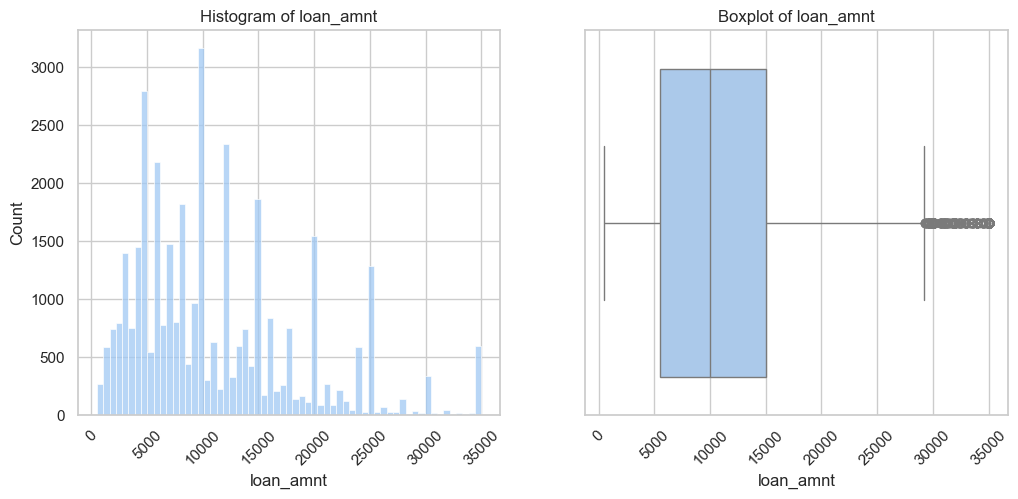

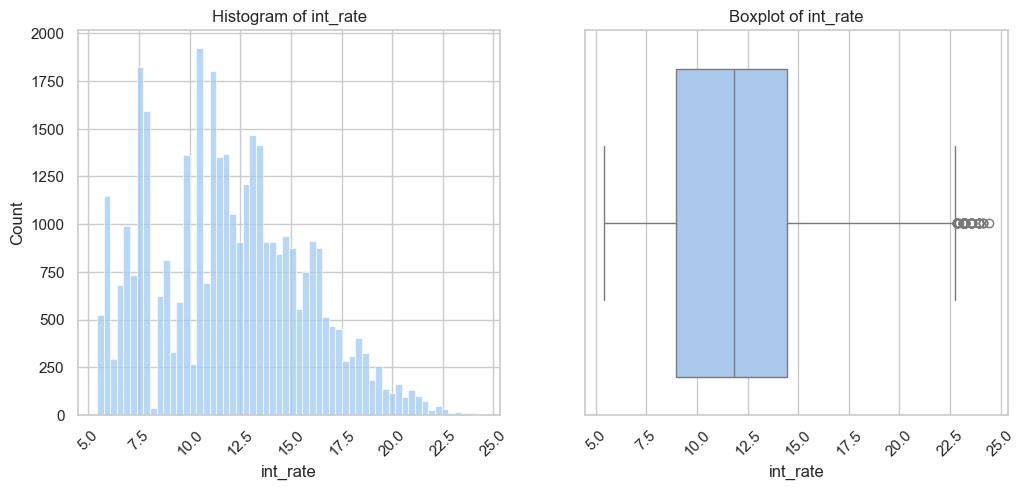

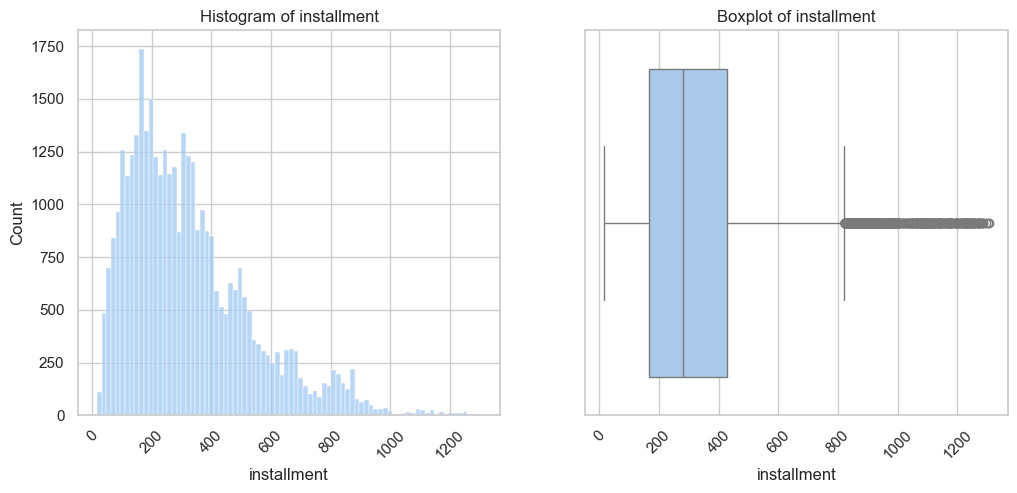

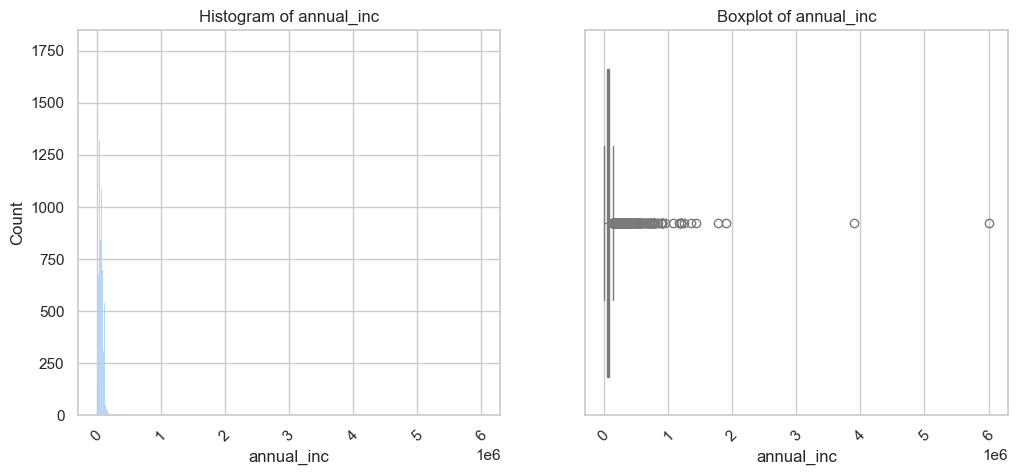

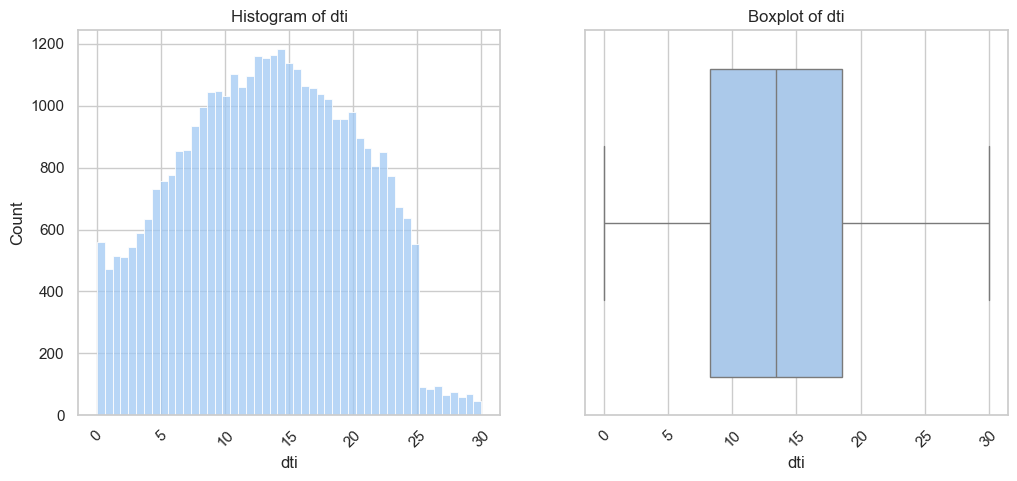

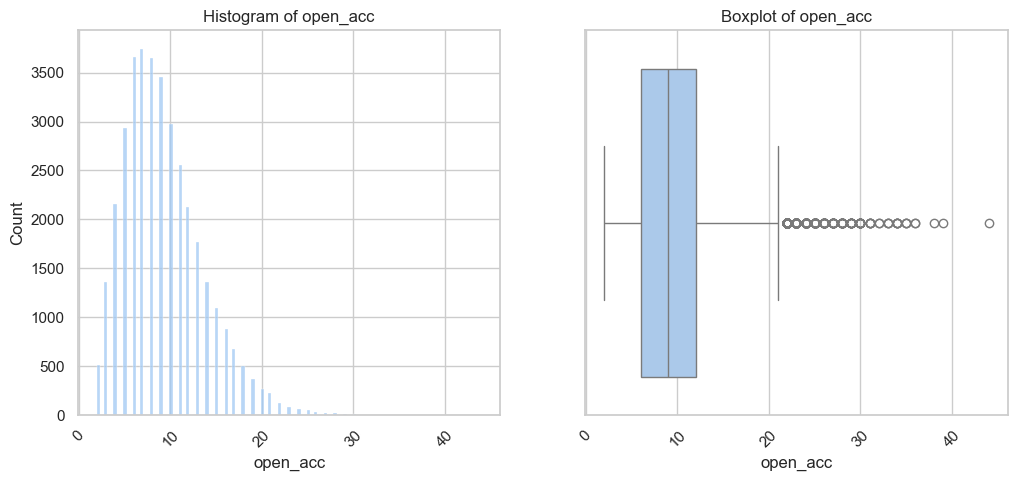

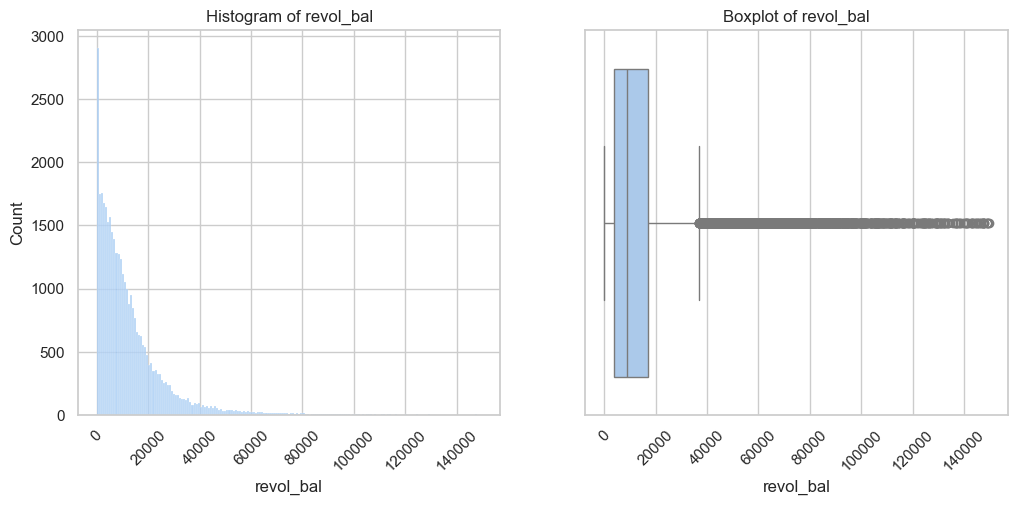

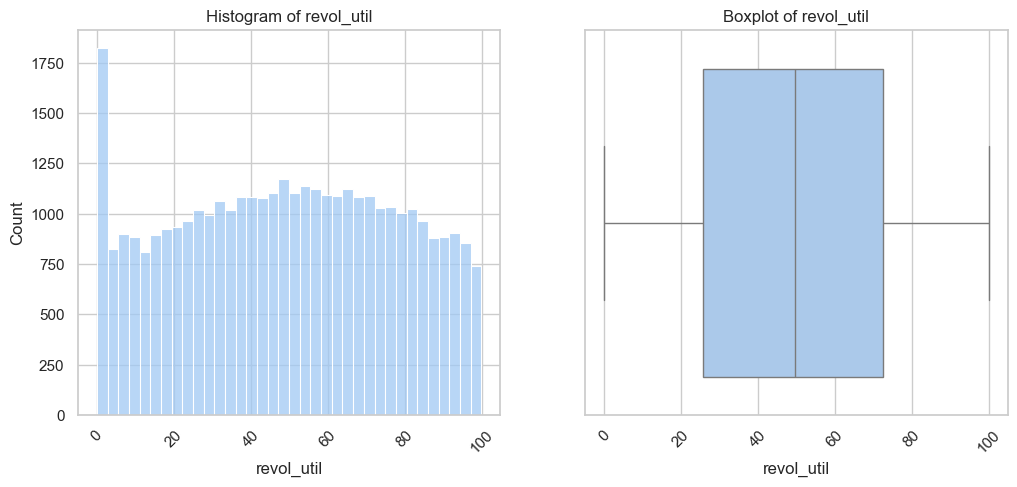

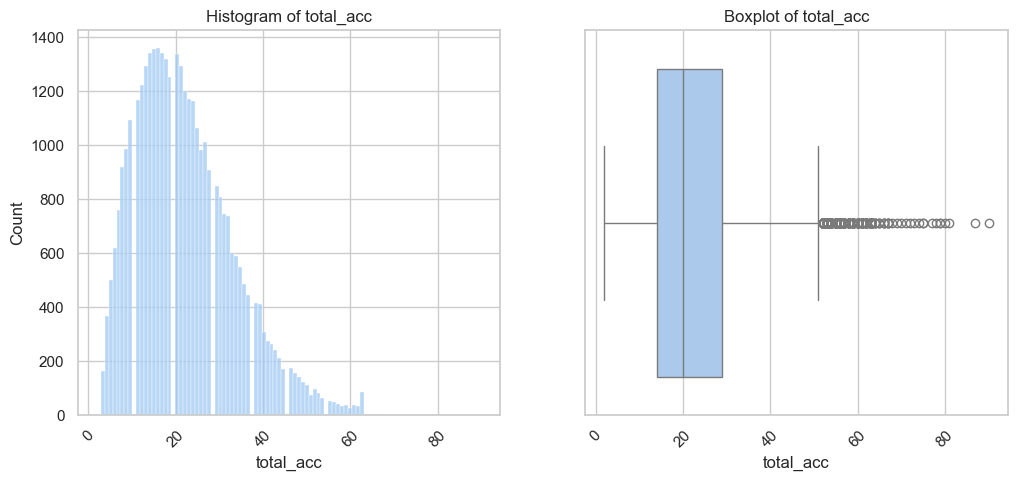

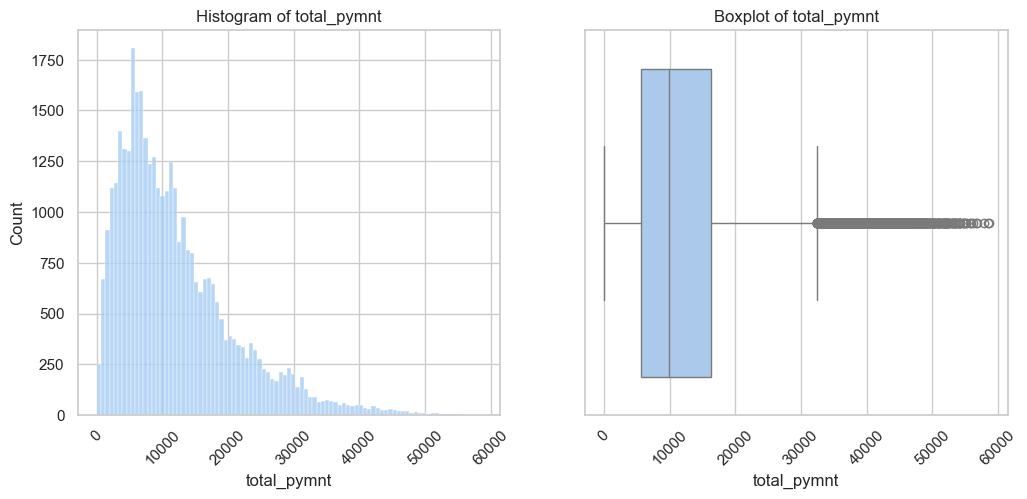

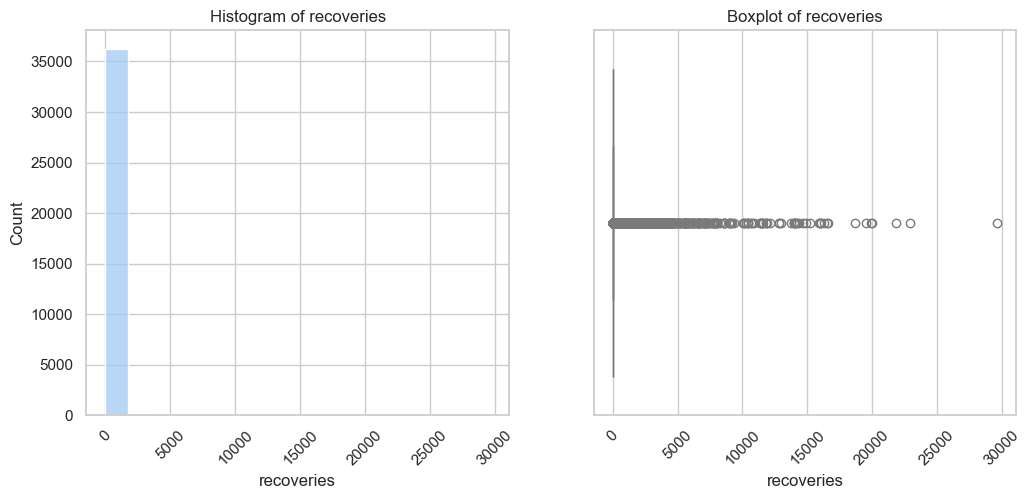

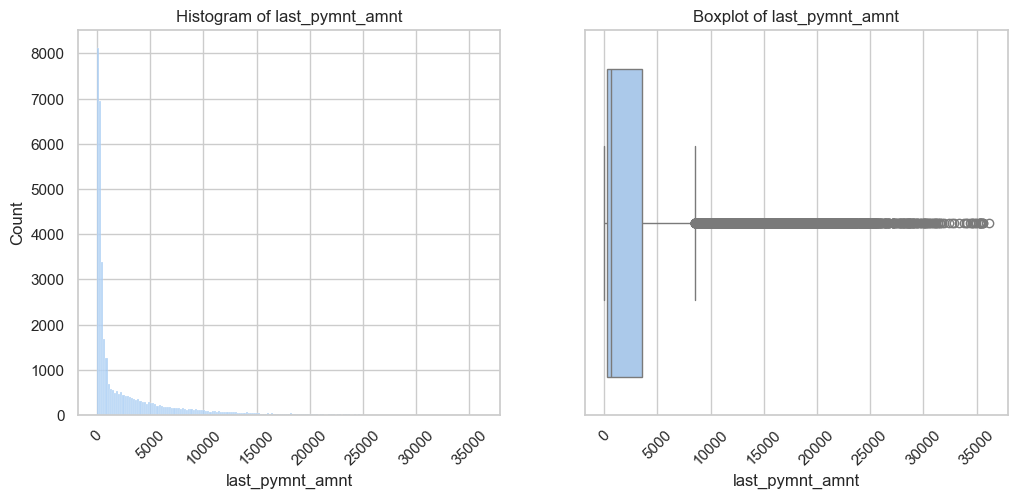

In [71]:
palette = sns.color_palette("pastel")
for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.set(style="whitegrid")
    #fig.patch.set_facecolor('lightgray')
    
    # Histplot on the first subplot
    sns.histplot(x=df_loan[col], ax=axes[0],color=palette[0])
    axes[0].set_title(f'Histogram of {col}')
    axes[0].tick_params(axis='x', rotation=45)

    # Boxplot on the second subplot
    sns.boxplot(x=df_loan[col], ax=axes[1], palette=palette)
    axes[1].set_title(f'Boxplot of {col}')
    axes[1].tick_params(axis='x', rotation=45)
    
    
    plt.show()


# Inferences

1) Most of the loan applications seems to be have loan amount between 5000 to 15000
2) Loan applications for amount 30000 and above are less frequent
3) 9 to 14% seems to be common interest rate
4) The frequency of loan applications decreases gradually as the interest rate increases beyond 15%, with very few instances above 20%.


# Univariate Analysis
### Categorical

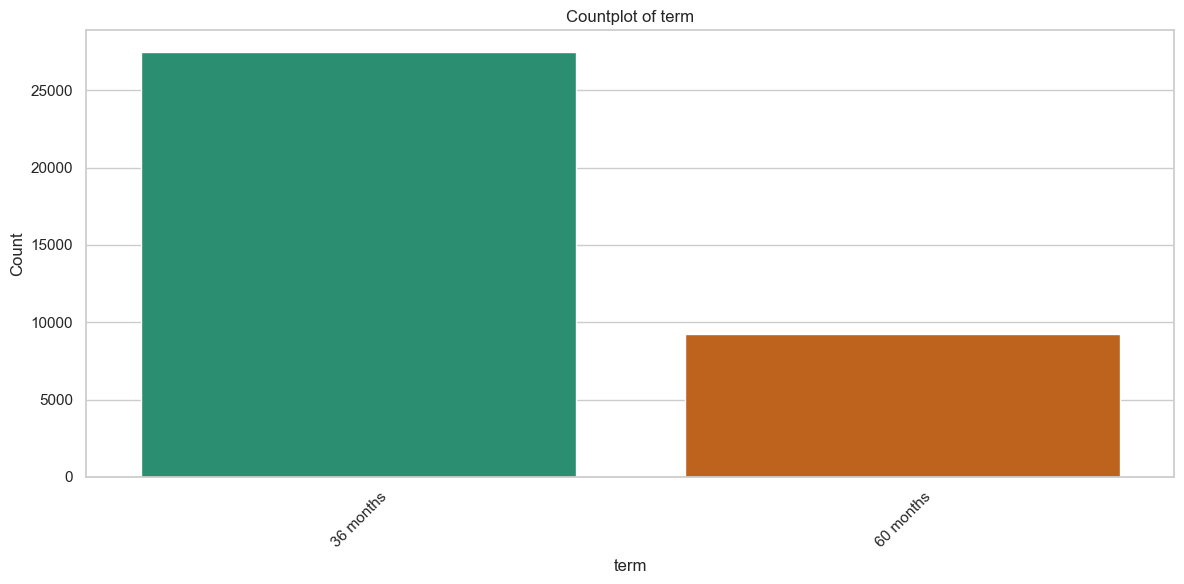

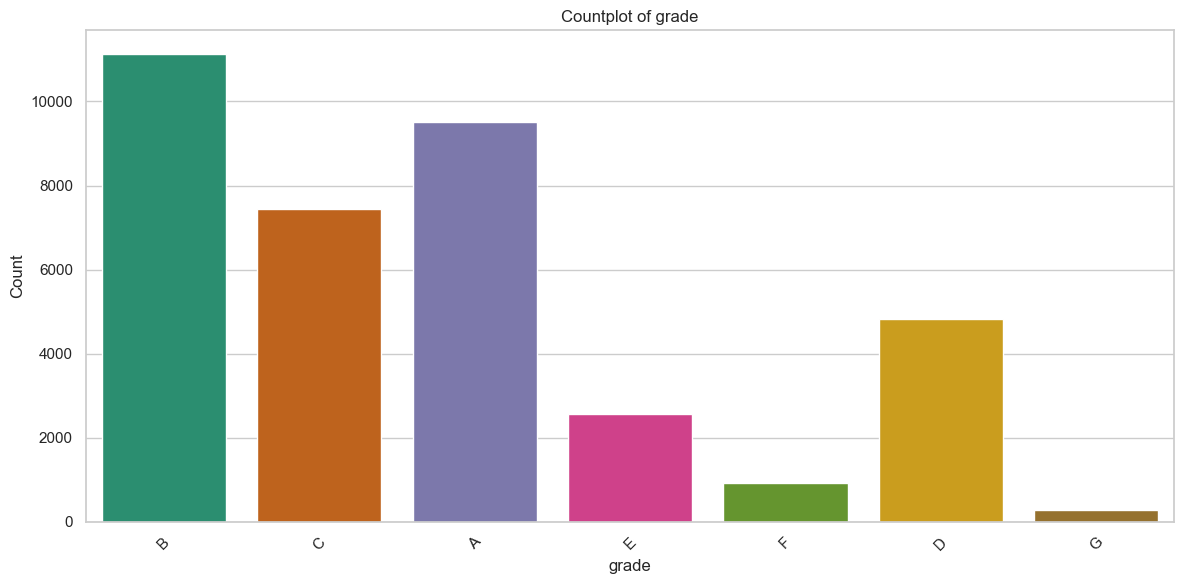

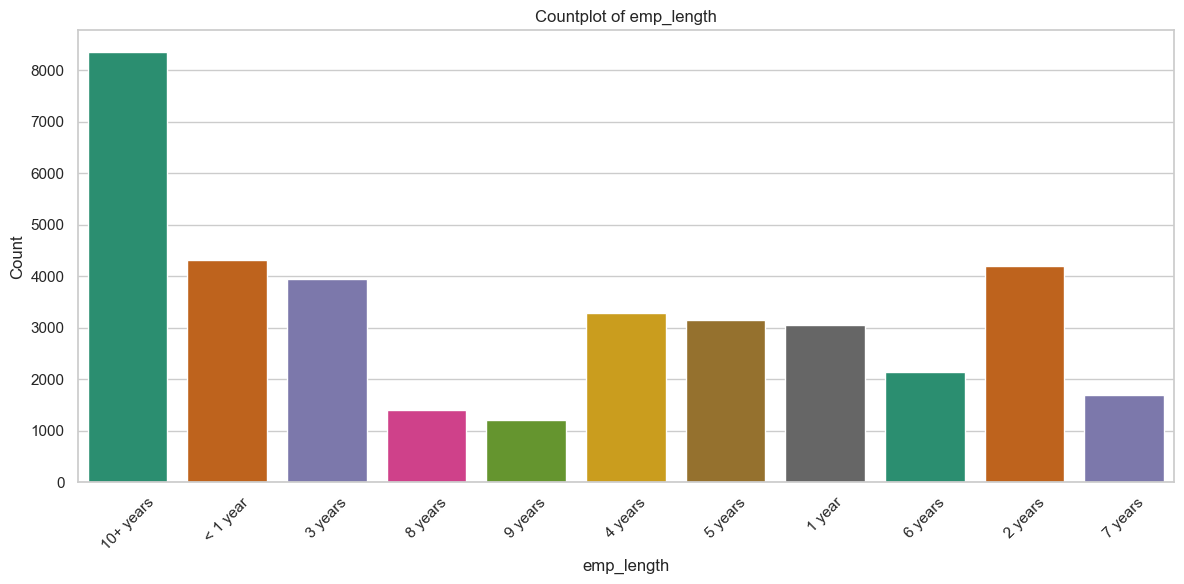

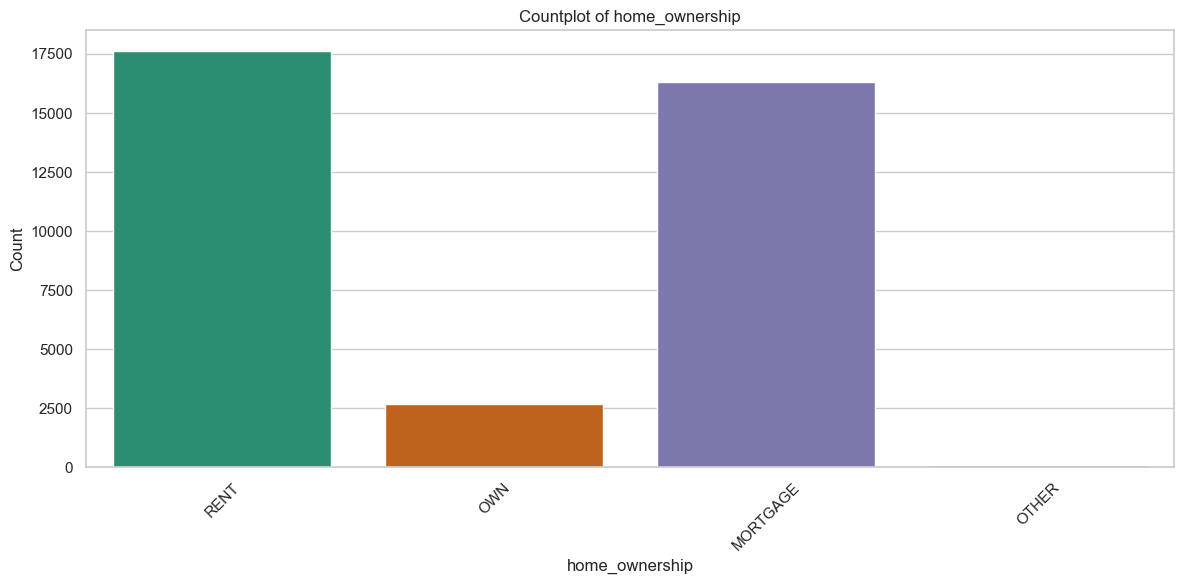

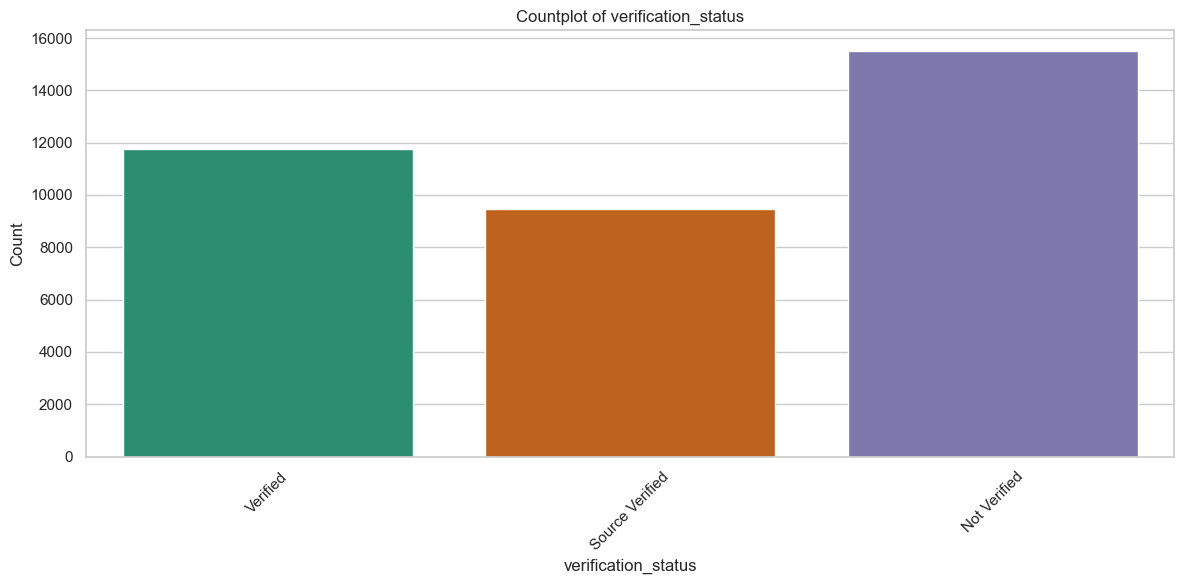

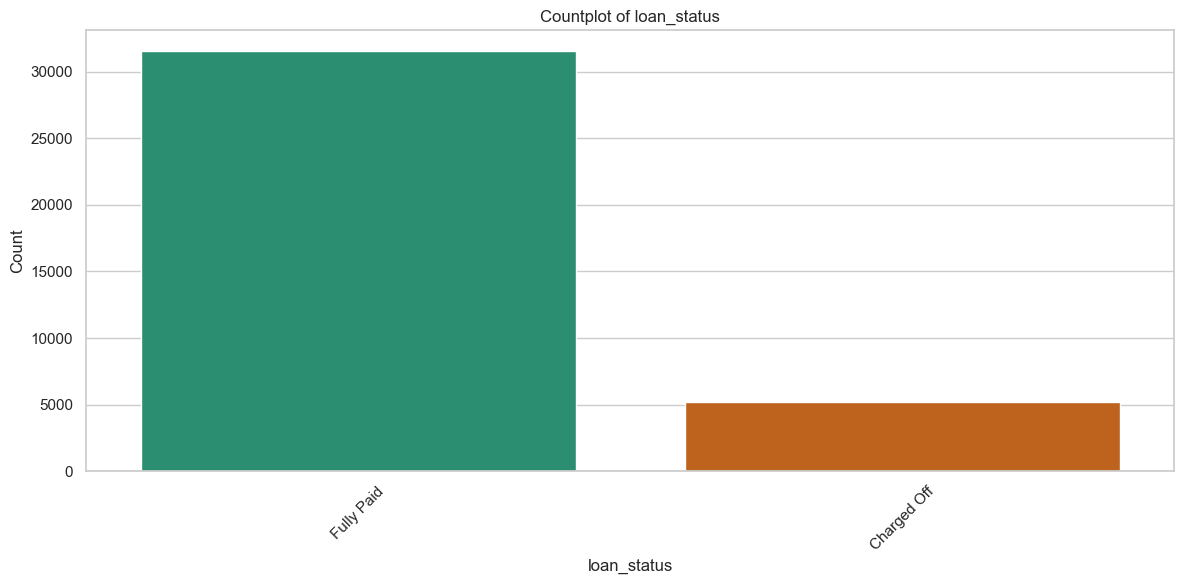

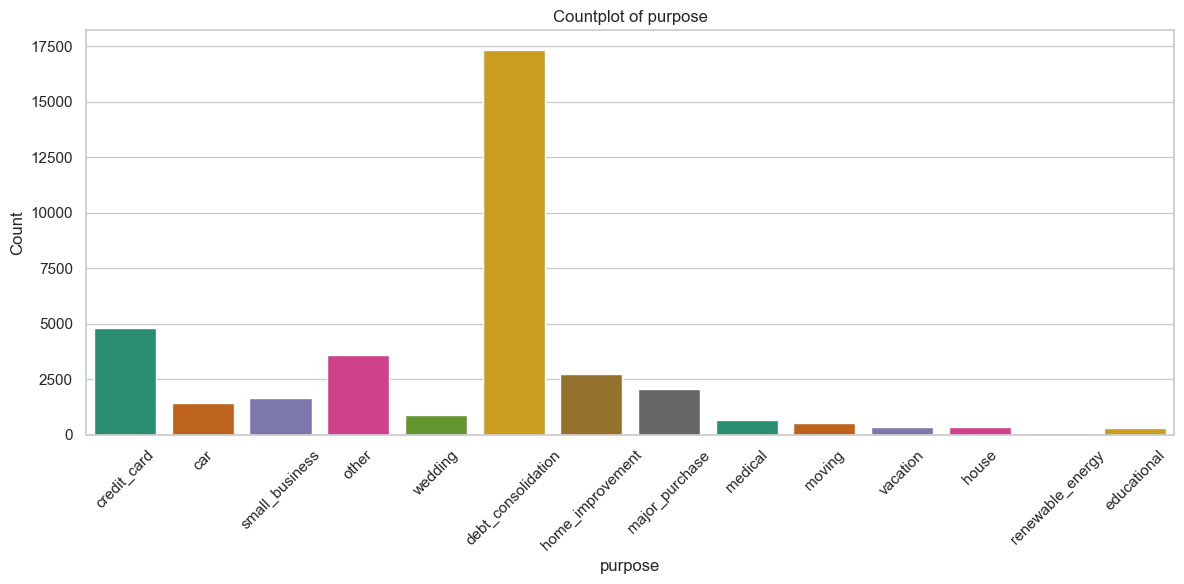

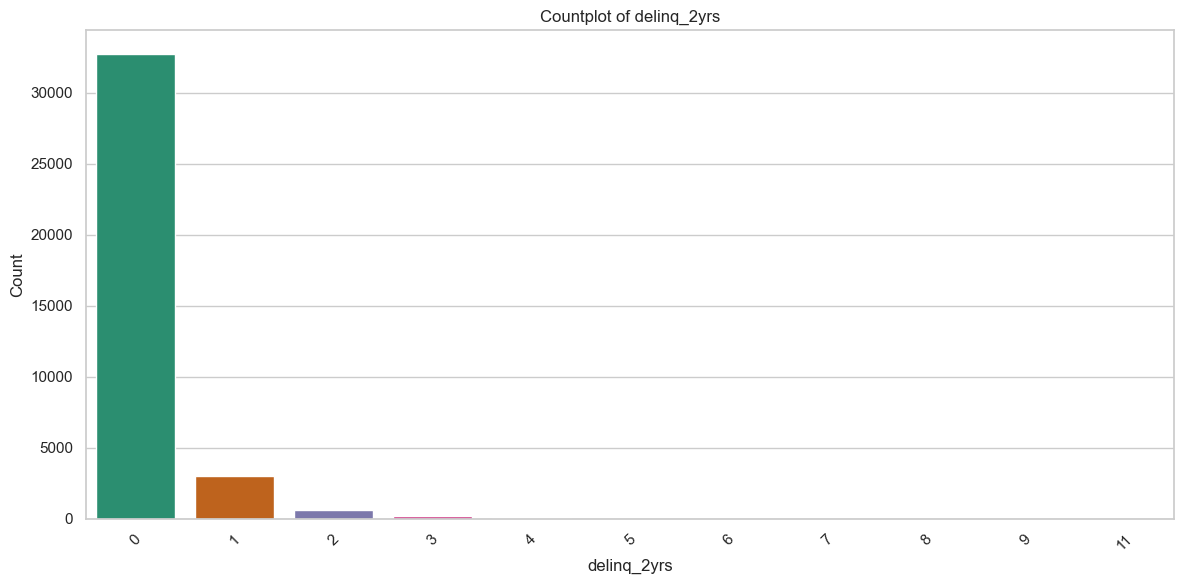

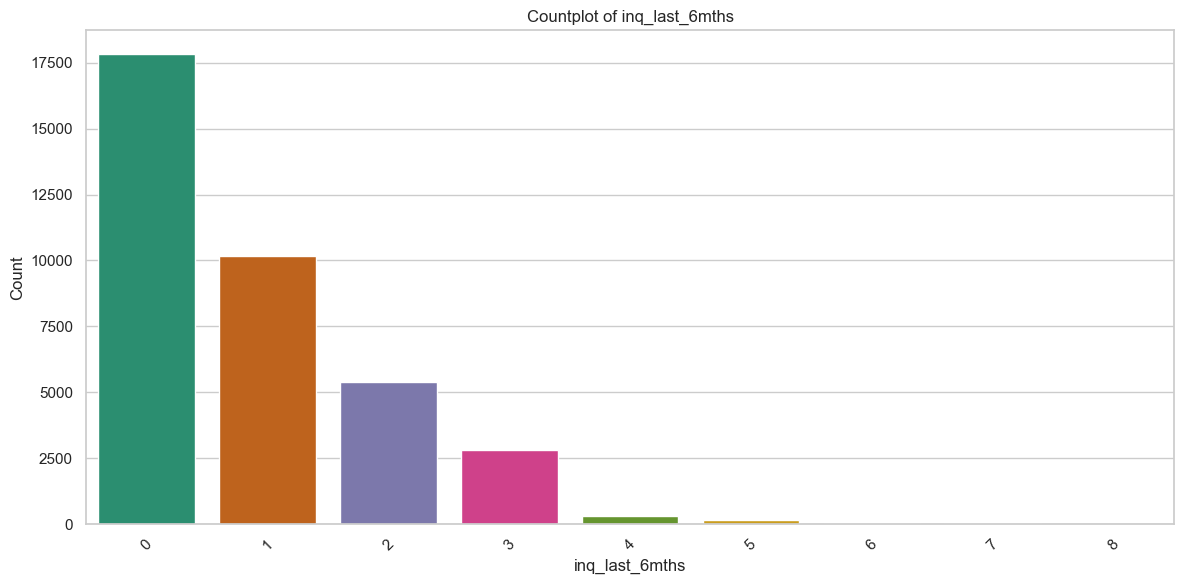

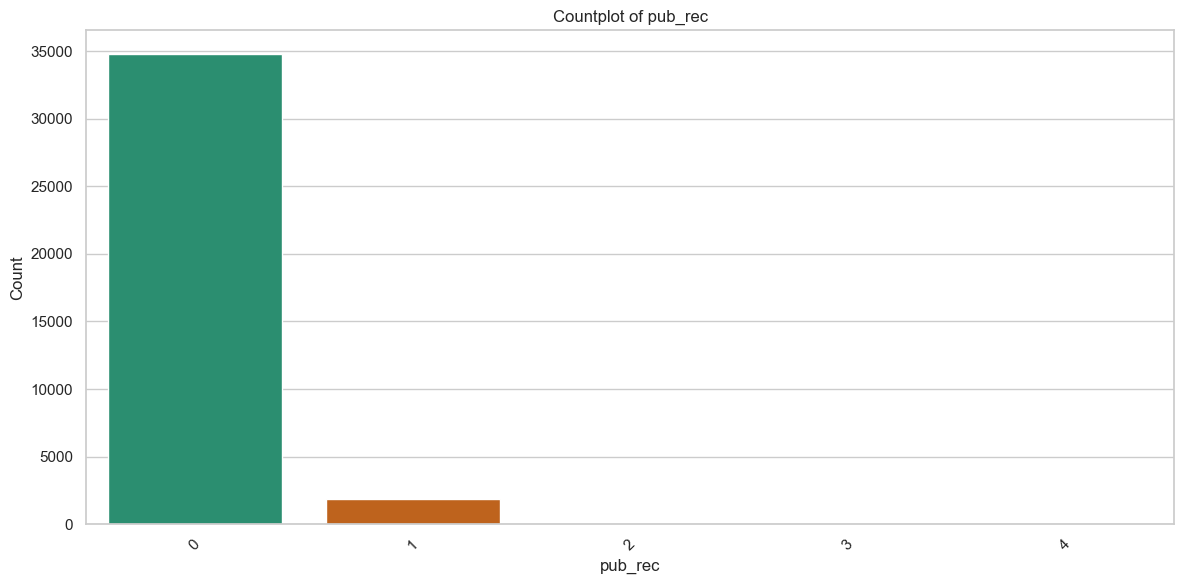

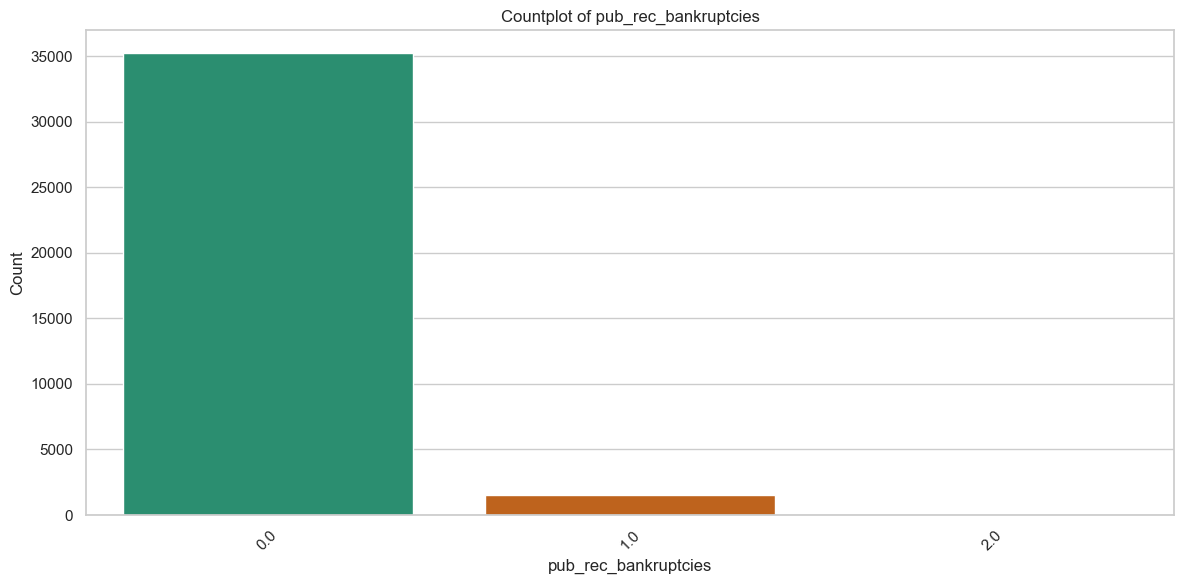

In [72]:

for cat_col in cat_cols:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Create a countplot
    sns.countplot(x=df_loan[cat_col], ax=ax, palette='Dark2')
    
    # Set the title and labels
    ax.set_title(f'Countplot of {cat_col}')
    ax.set_xlabel(cat_col)
    ax.set_ylabel('Count')
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Bivariate Analysis

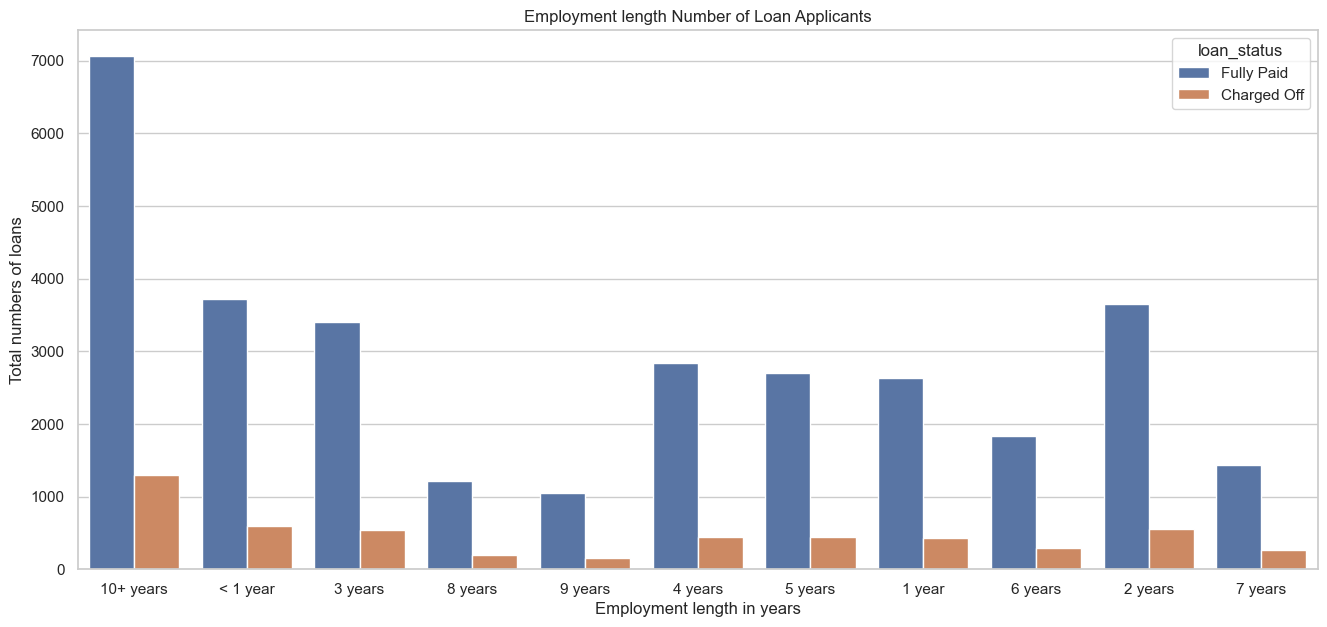

In [48]:
#draw a countplot to show the year wise increasing amount of loans in lending clubs 
plt.figure(figsize=(16,7))
sns.set(style="whitegrid")
ax=sns.countplot(x='emp_length',data=df_loan,hue='loan_status')
xpos=np.arange((df_loan['emp_length'].nunique()))
ax.set(xlabel='Employment length in years', ylabel='Total numbers of loans',title='Employment length Number of Loan Applicants')
plt.xticks(xpos,df_loan['emp_length'].unique())
plt.show()

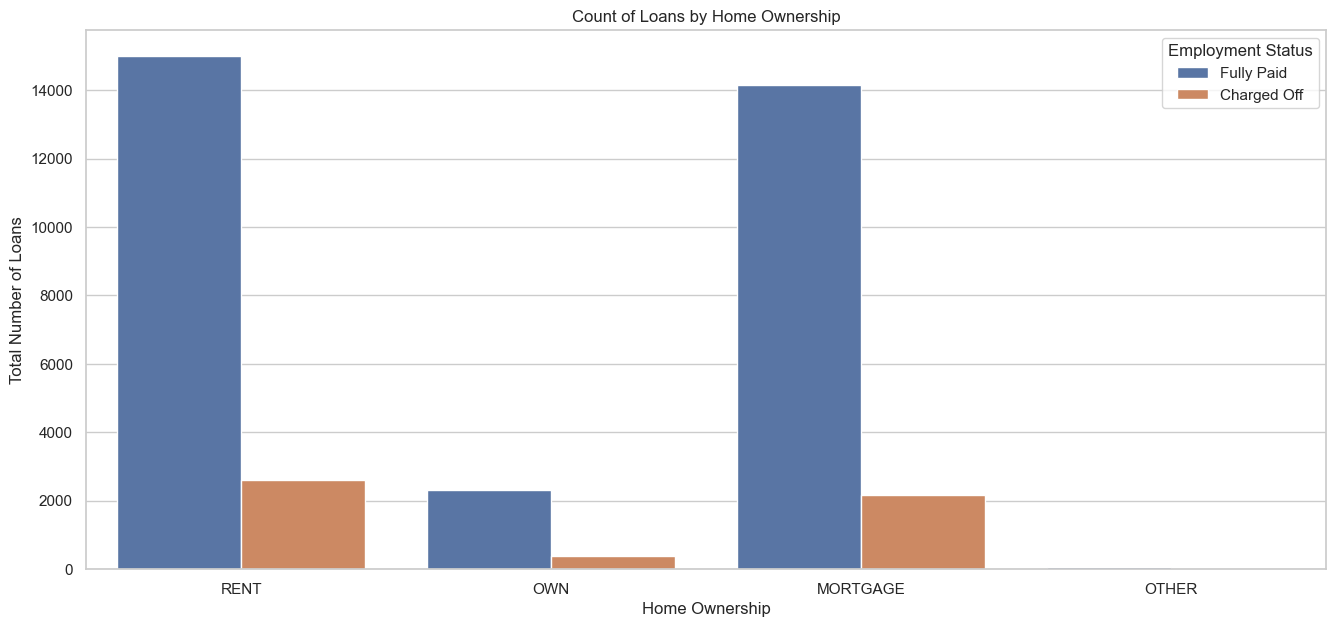

In [49]:
plt.figure(figsize=(16, 7))
sns.set(style="whitegrid")

# Plot countplot
ax = sns.countplot(x='home_ownership', data=df_loan, hue = 'loan_status')

# Set xticks and labels
xpos = np.arange(df_loan['home_ownership'].nunique())
plt.xticks(xpos, df_loan['home_ownership'].unique())

# Set labels and title
ax.set(xlabel='Home Ownership', ylabel='Total Number of Loans', title='Count of Loans by Home Ownership')

# Add legend
legend_labels = ['Fully Paid', 'Charged Off']
ax.legend(title='Employment Status', labels=legend_labels)

plt.show()


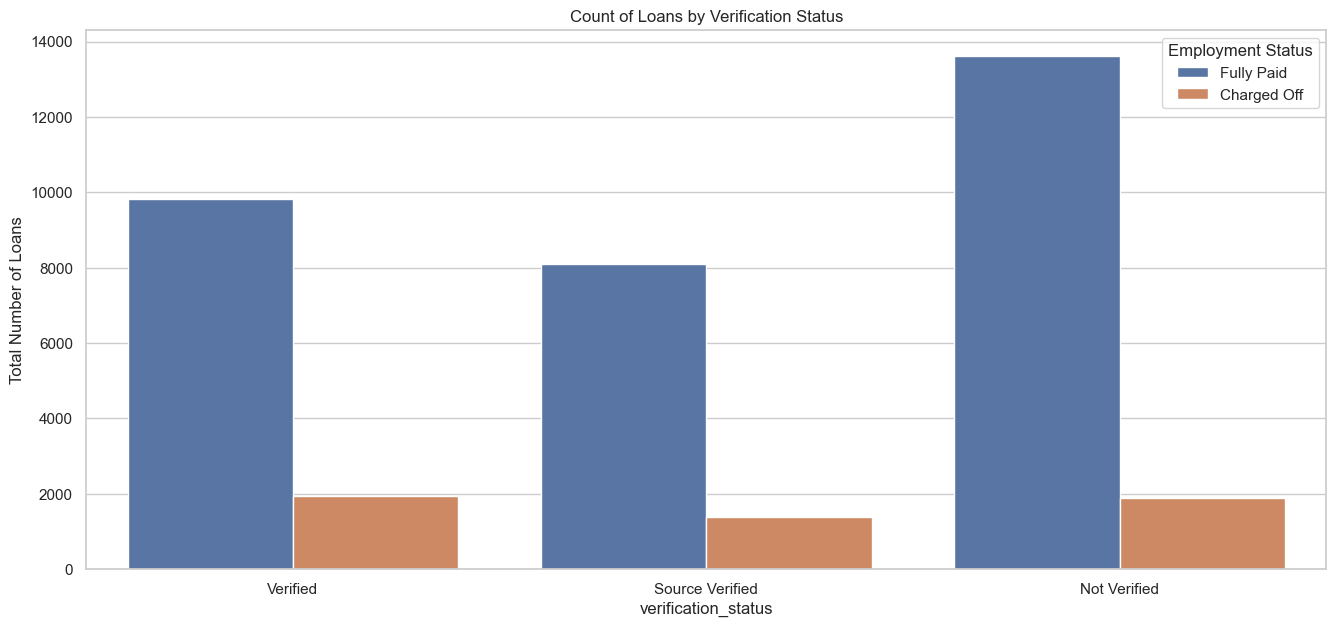

In [50]:
plt.figure(figsize=(16, 7))
sns.set(style="whitegrid")

# Plot countplot
ax = sns.countplot(x='verification_status', data=df_loan, hue = 'loan_status')

# Set xticks and labels
xpos = np.arange(df_loan['verification_status'].nunique())
plt.xticks(xpos, df_loan['verification_status'].unique())

# Set labels and title
ax.set(xlabel='verification_status', ylabel='Total Number of Loans', title='Count of Loans by Verification Status')

# Add legend
legend_labels = ['Fully Paid', 'Charged Off']
ax.legend(title='Employment Status', labels=legend_labels)

plt.show()


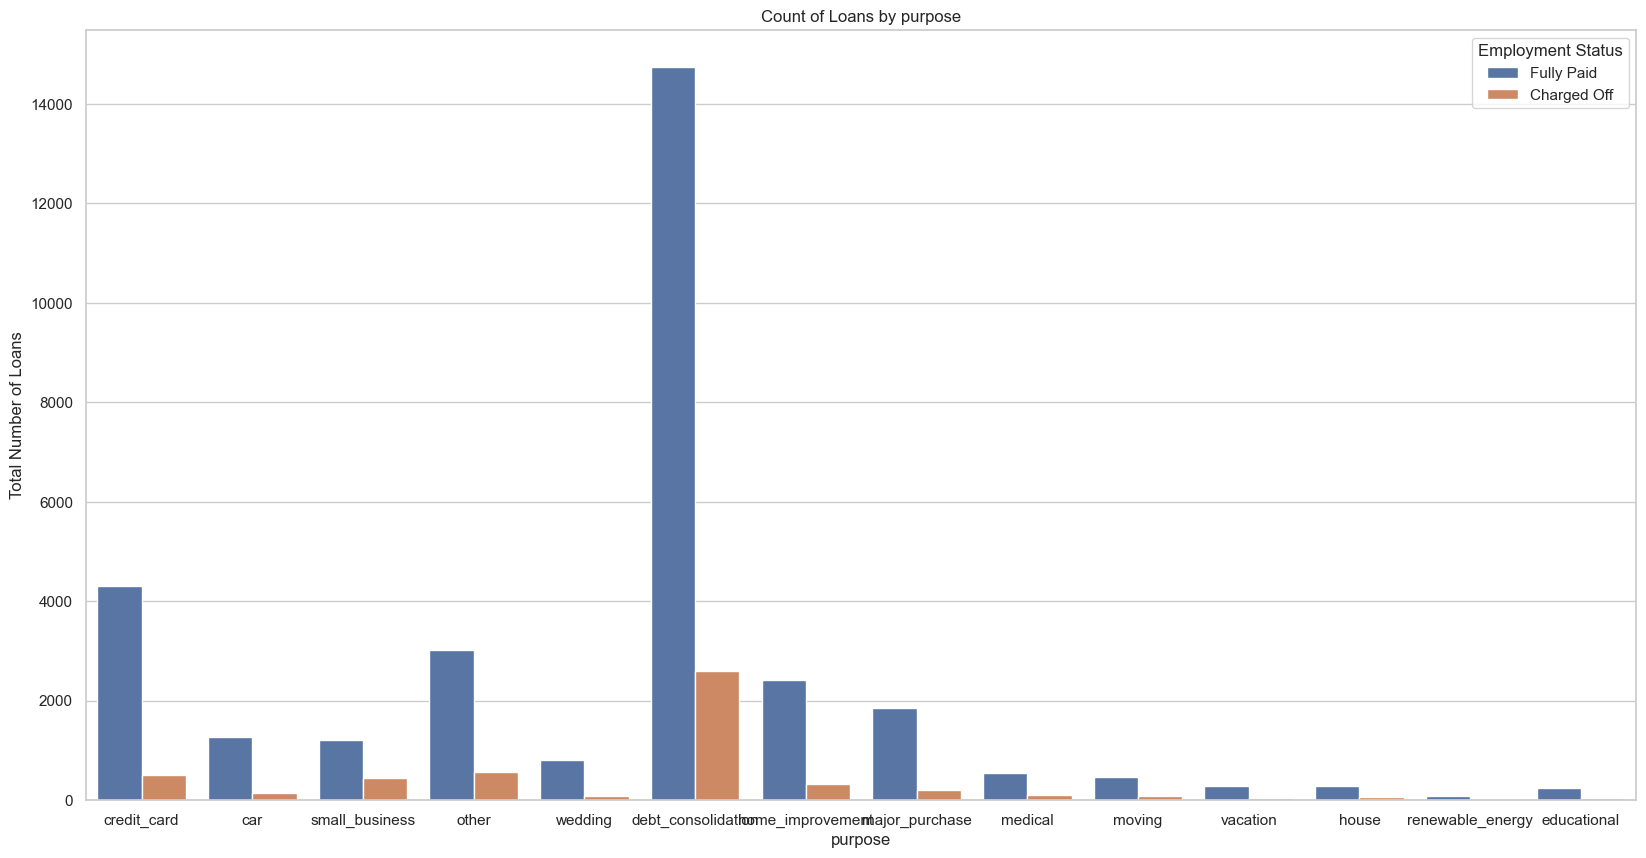

In [75]:
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")

# Plot countplot
ax = sns.countplot(x='purpose', data=df_loan, hue = 'loan_status')

# Set xticks and labels
xpos = np.arange(df_loan['purpose'].nunique())
plt.xticks(xpos, df_loan['purpose'].unique())

# Set labels and title
ax.set(xlabel='purpose', ylabel='Total Number of Loans', title='Count of Loans by purpose')

# Add legend
legend_labels = ['Fully Paid', 'Charged Off']
ax.legend(title='Employment Status', labels=legend_labels)

plt.show()


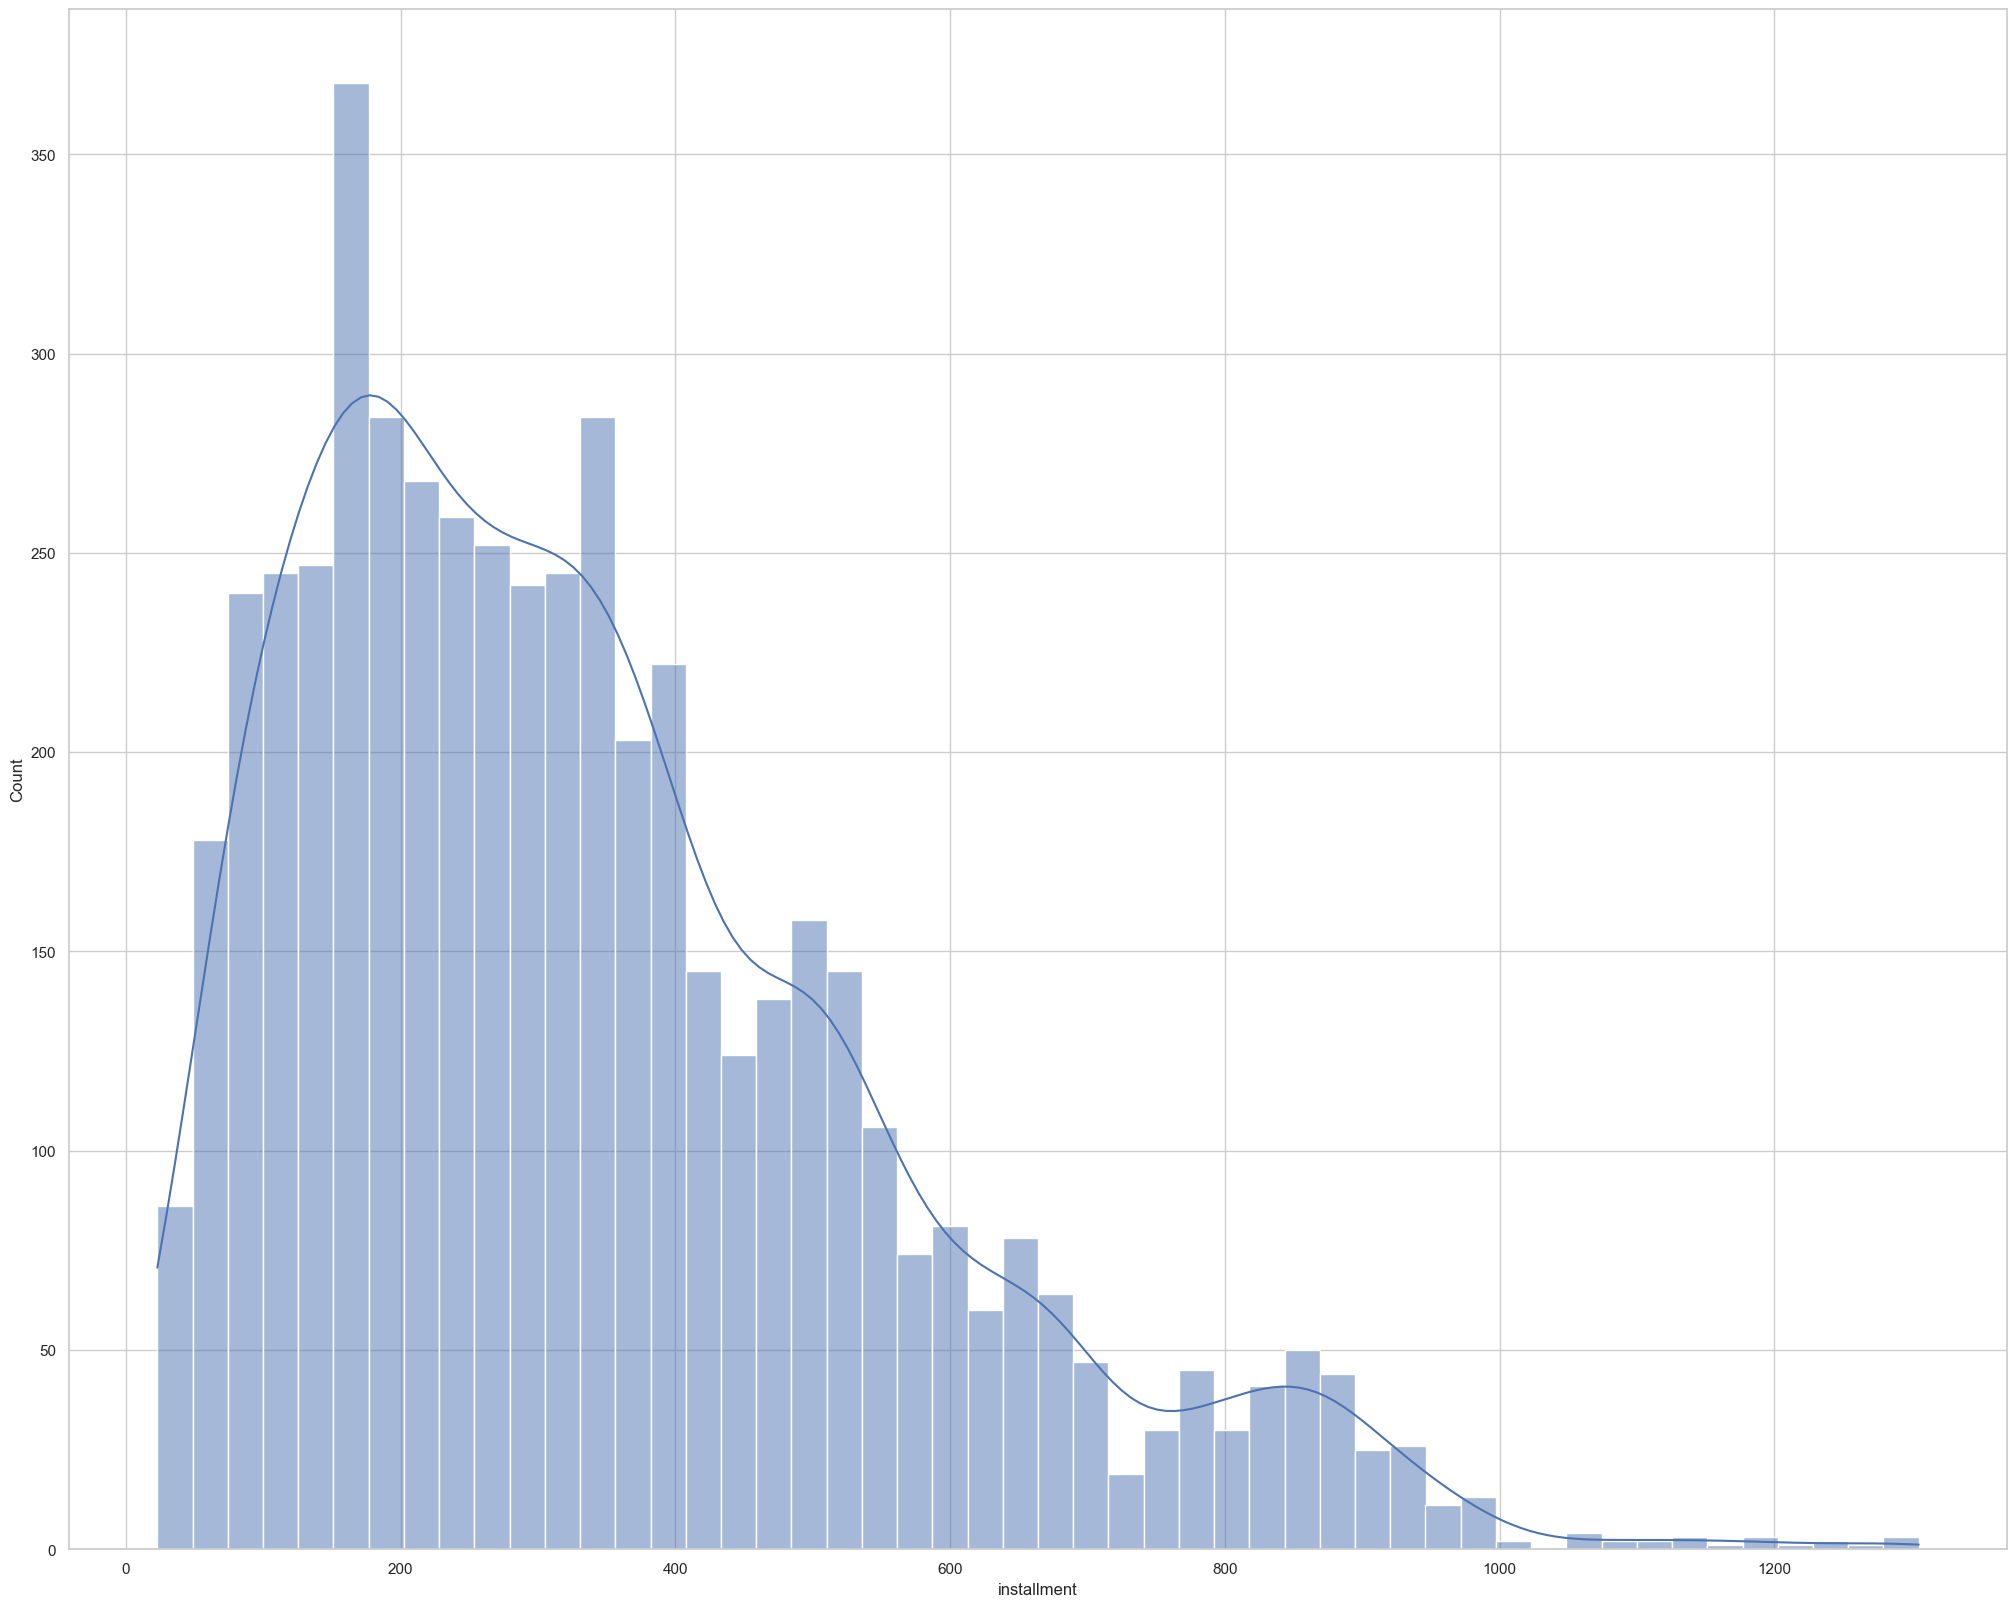

In [52]:
installments_df = df_loan[df_loan.loan_status == 'Charged Off']
plt.figure(figsize=(25, 20))
sns.set(style="whitegrid")

# Plot countplot
sns.histplot(installments_df, x='installment', bins=50, kde = True)

# Set labels and title
ax.set( xlabel='Installment', ylabel='Frequency', title='Installments')


plt.show()

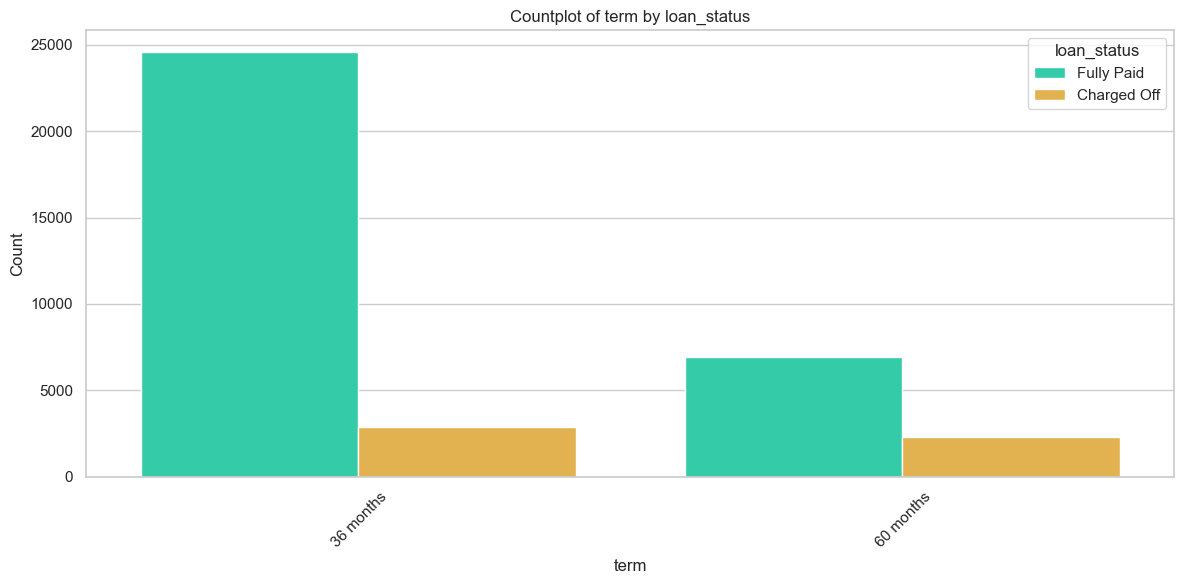

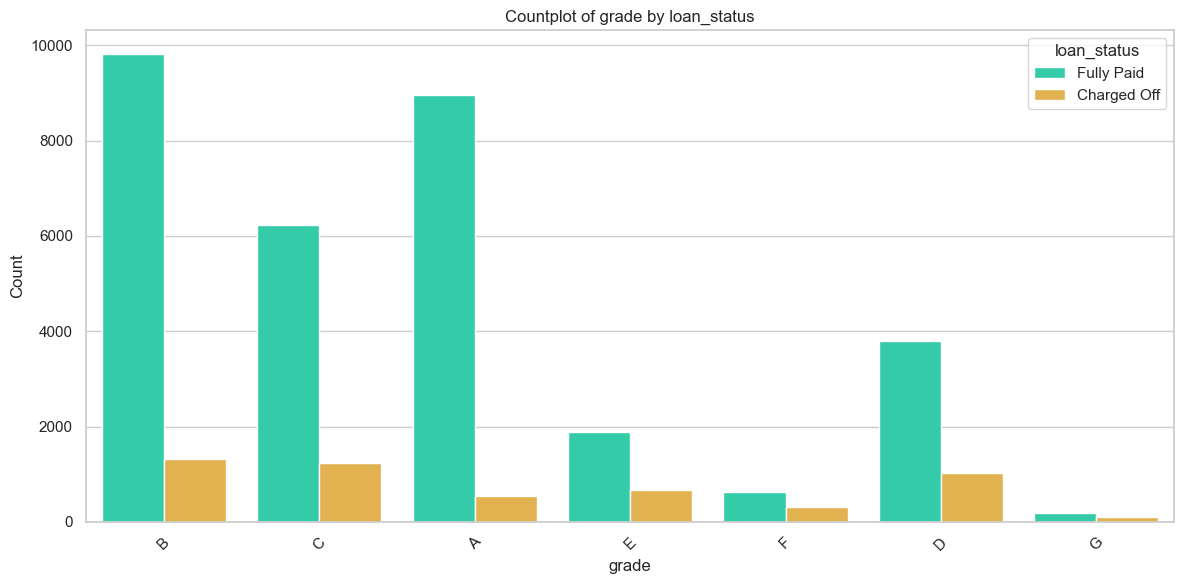

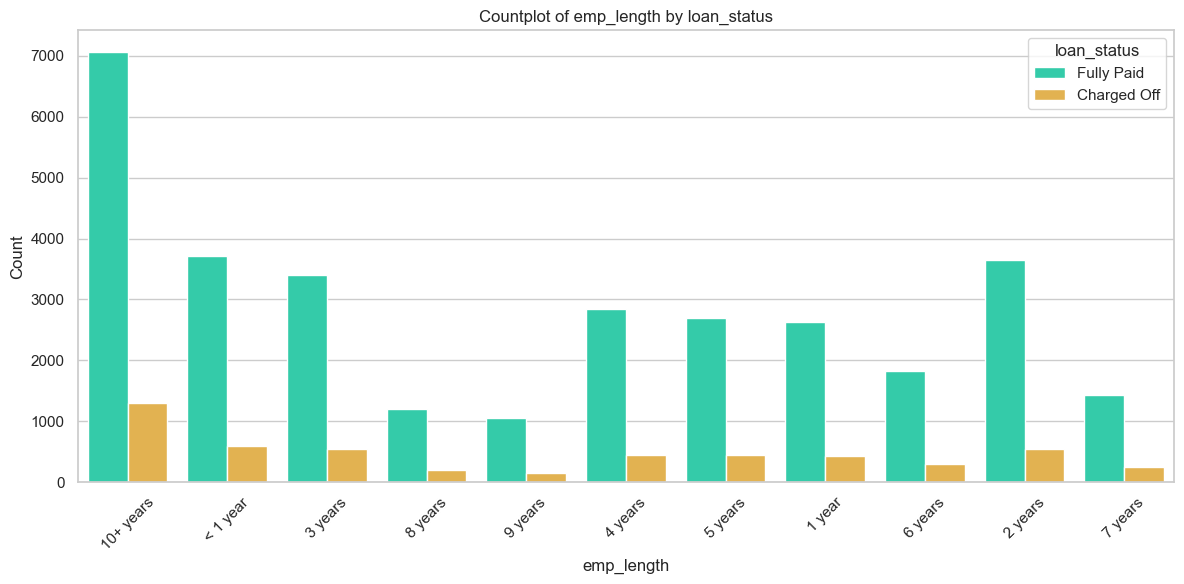

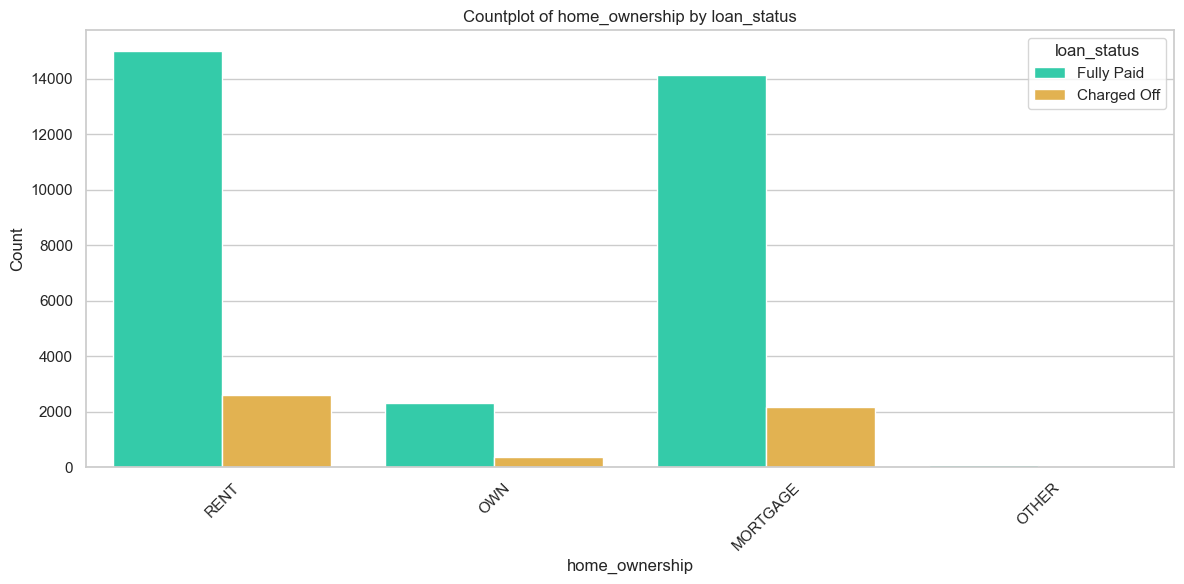

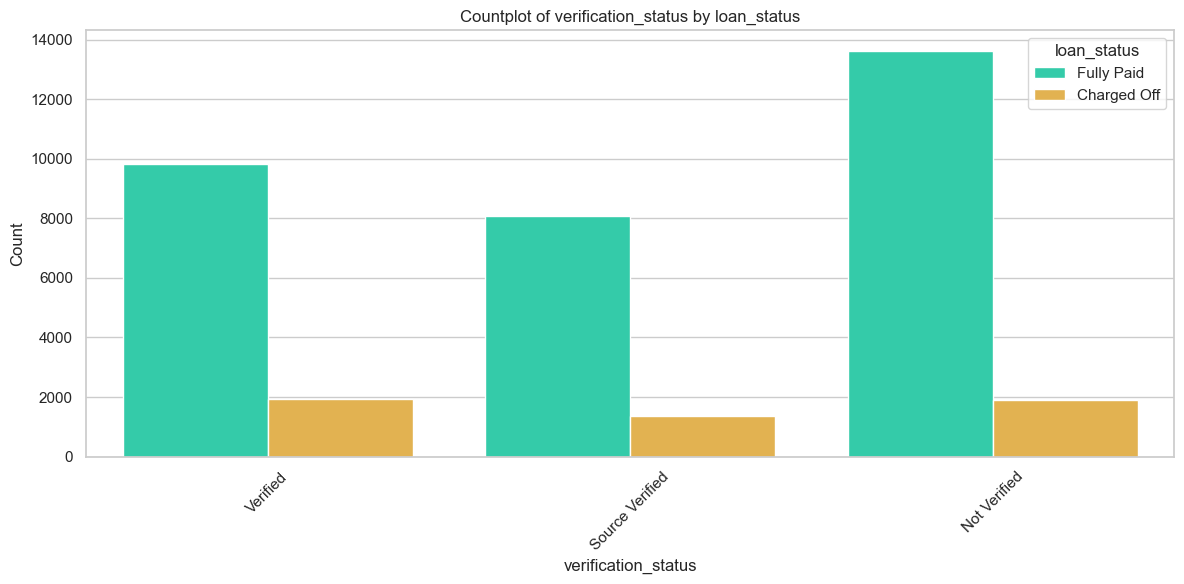

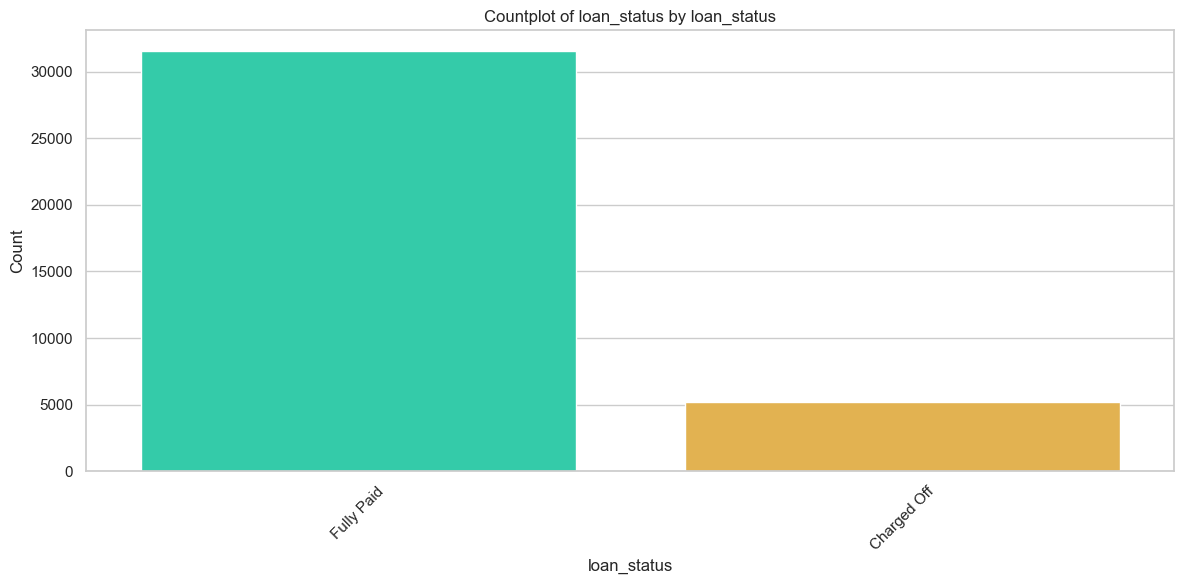

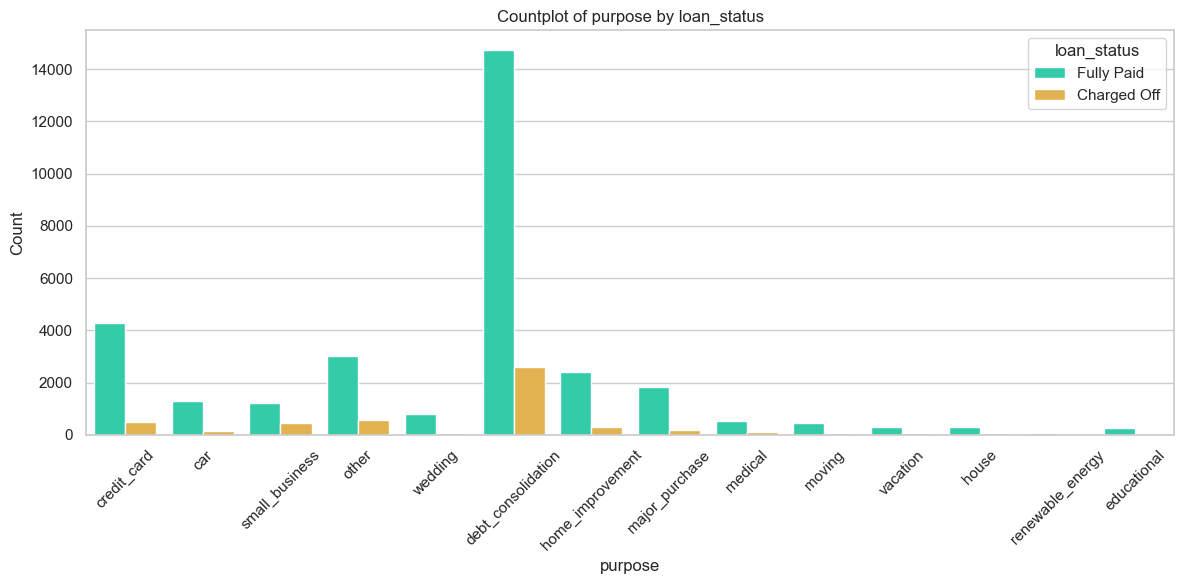

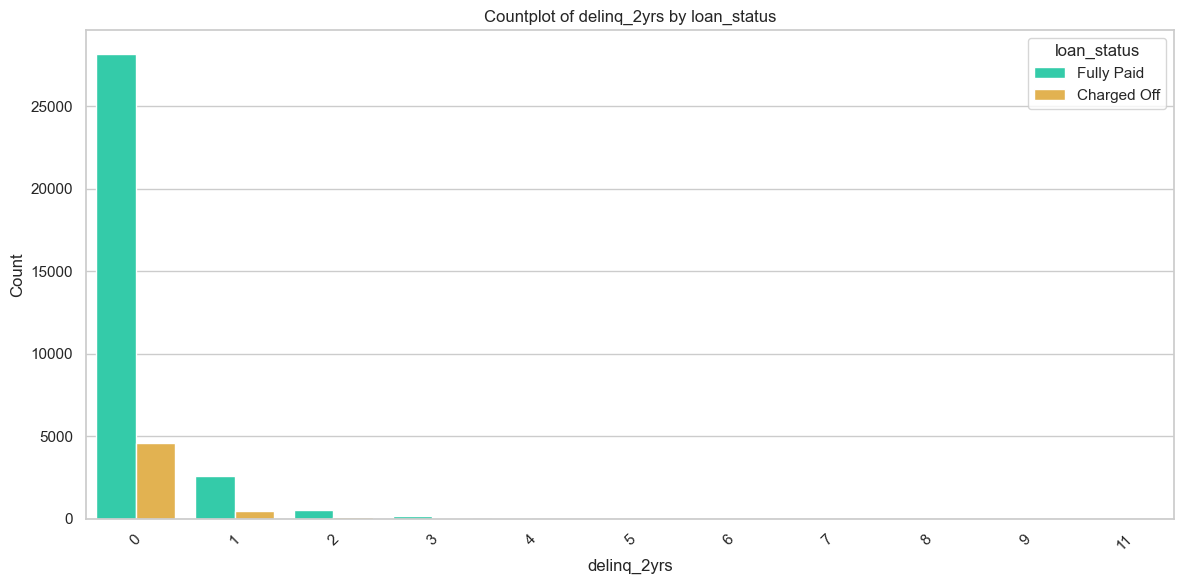

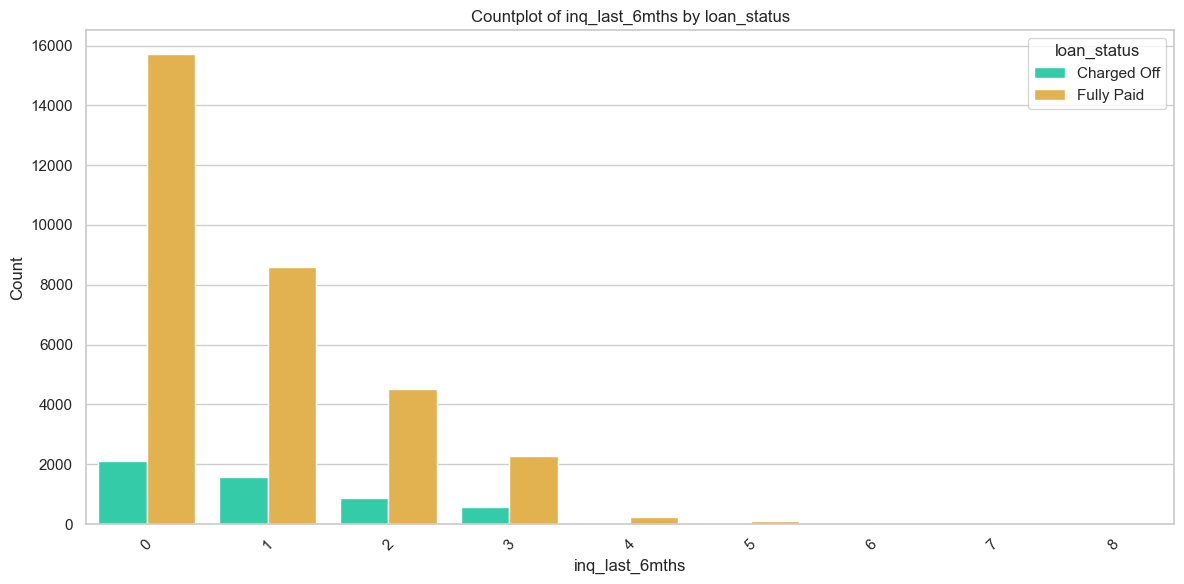

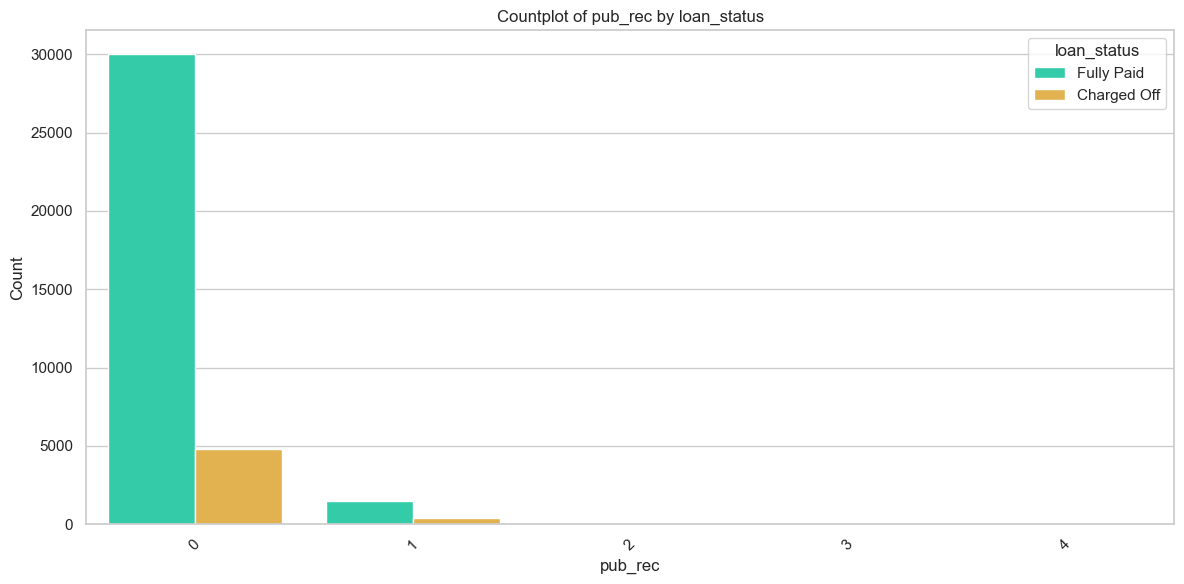

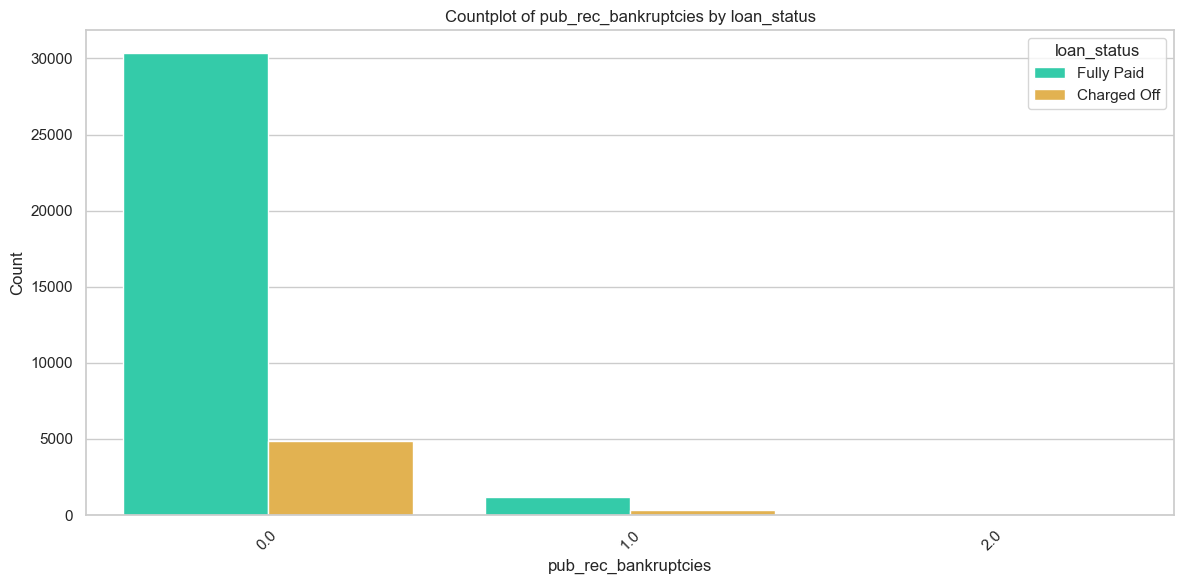

In [85]:

target_col = 'loan_status'

# Loop through each categorical column
for cat_col in cat_cols:
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Create a countplot
    sns.countplot(x=df_loan[cat_col], hue=df_loan[target_col], ax=ax,palette='turbo')
    
    # Set the title and labels
    ax.set_title(f'Countplot of {cat_col} by {target_col}')
    ax.set_xlabel(cat_col)
    ax.set_ylabel('Count')
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Multivariate Analysis

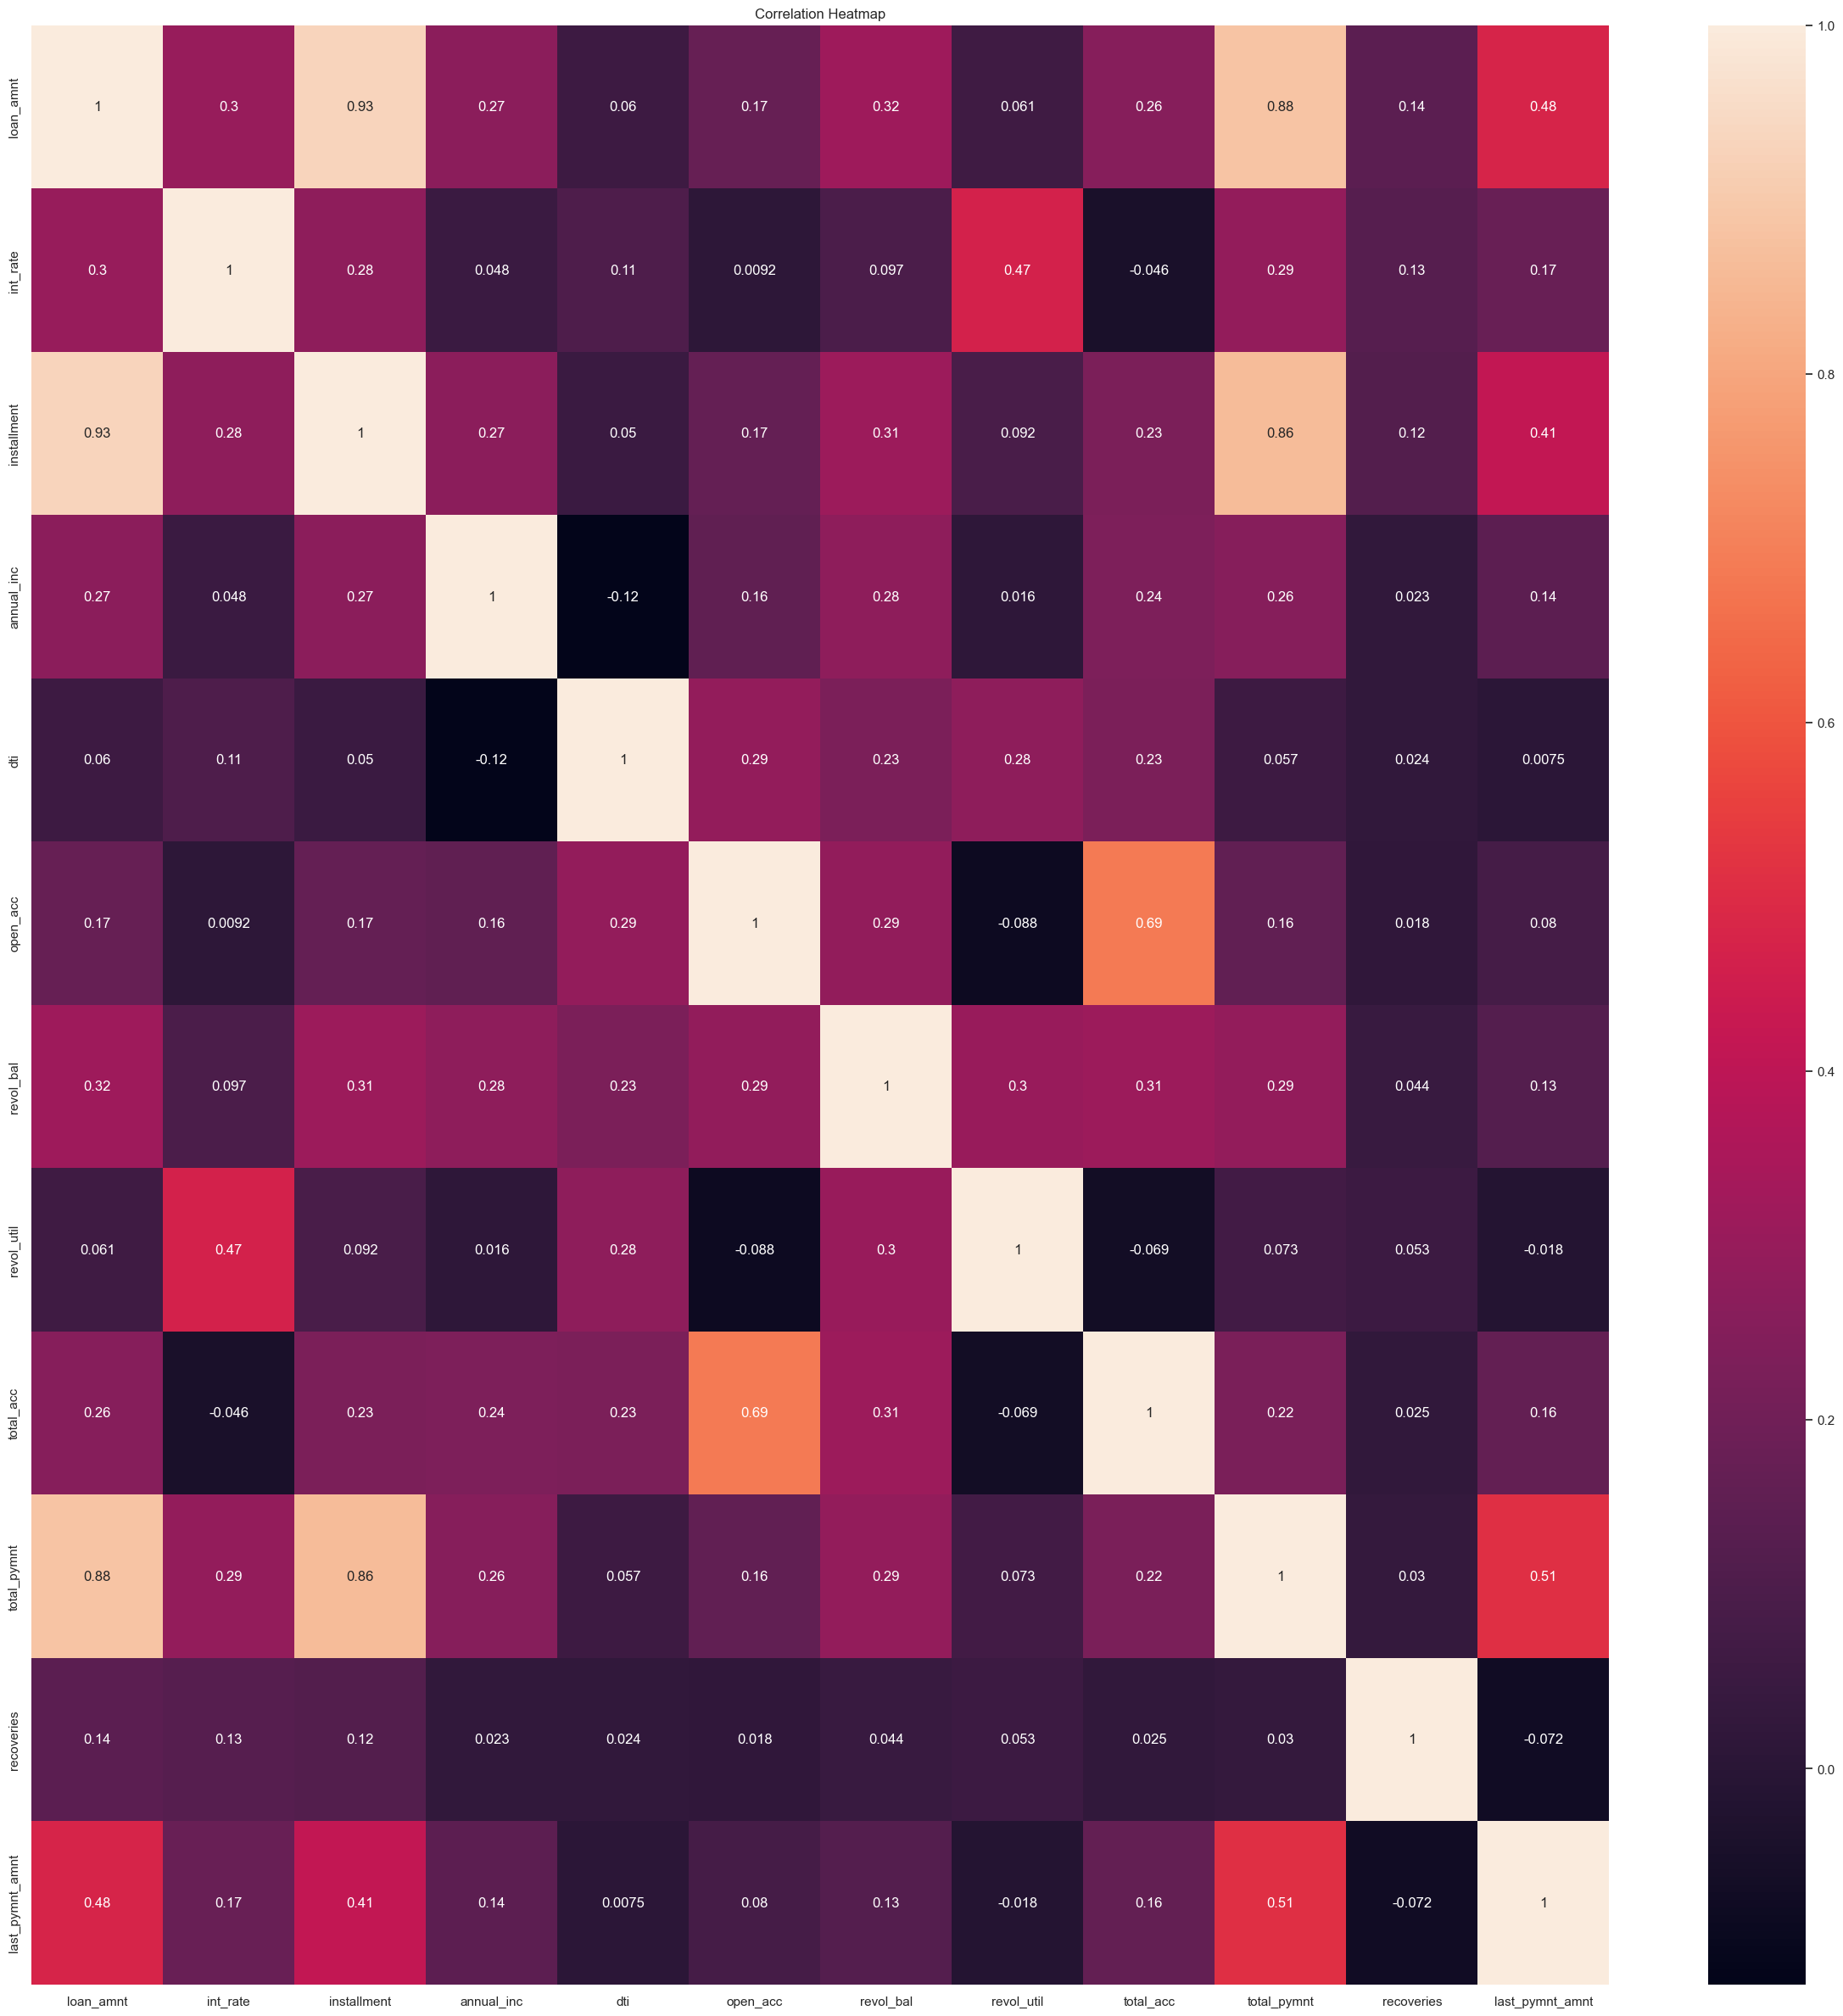

In [73]:

# Correlation matrix
corr_matrix = df_loan[num_cols].corr()

# Heatmap
plt.figure(figsize=(30, 30))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Heatmap')
plt.show()